# 3_BCG_Ab_6wk - Filter CR filtered cells based on cutoffs

In [1]:
library(ArchR)
library(dplyr)
library(Seurat)
library(Cairo)
library(ggplot2)
library(Matrix)
library(hexbin)
library(gridExtra)
library(Signac)
library(tidyverse)
library(reshape2)
library(GenomicRanges)
library(EnsDb.Mmusculus.v79)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


The following objects are masked from ‘package:data.table’:

    dcast, melt


Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: AnnotationFilter


Attaching package: ‘AnnotationFilter’


The following object is masked from ‘package:magrittr’:

    not



Attaching package: 'ensembldb'


The following object is masked from 'package:dplyr':

    filter


The following object is masked from 'package:stats':

    filter




In [2]:
sample <- '3_BCG_Ab_6wk'

In [3]:
CR_DIR <- '/athena/josefowiczlab/scratch/rer4011/projects/tori_atac_data/cellranger_outs_batch1/'
ARCHR_OUT <- '/athena/josefowiczlab/scratch/rer4011/projects/tori_atac_data/intermediate_results/per_sample_Archr'
proj_name <- 'cr_filt'
Archr_Dir <- file.path(ARCHR_OUT,paste0(sample,'_ArchR'))
#cr_out <- file.path(CR_DIR,sample,'outs')
cr_out <- file.path(CR_DIR,sample)
setwd(Archr_Dir)

# Read ArchR object

In [4]:
proj <- loadArchRProject(file.path(Archr_Dir,proj_name))
#proj <- addDoubletScores(input = proj, k = 10, knnMethod = "UMAP", LSIMethod = 1)
archr_metadata <- as.data.frame(getCellColData(proj))
proj

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /athena/cayuga_0039/scratch/rer4011/projects/tori_atac_data/intermediate_results/per_sample_Archr/3_BCG_Ab_6wk_ArchR/cr_filt 
samples(1): 3_BCG_Ab_6wk
sampleColData names(1): ArrowFiles
cellColData names(16): Sample TSSEnrichment ... DoubletScore
  DoubletEnrichment
numberOfCells(1): 7160
medianTSS(1): 19.0805
medianFrags(1): 15456

In [5]:
head(archr_metadata)

Sample       TSSEnrichment ReadsInTSS
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 3_BCG_Ab_6wk 21.279        2579      
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 3_BCG_Ab_6wk 21.965         721      
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 3_BCG_Ab_6wk  9.428        1814      
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 3_BCG_Ab_6wk 23.427        4815      
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 3_BCG_Ab_6wk 23.859        2217      
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 3_BCG_Ab_6wk 17.108        2445      
                                ReadsInPromoter ReadsInBlacklist PromoterRatio
3_BCG_Ab_6wk#AAACAGCCACCATATG-1  9280           1477             0.3300377    
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1  2490            202             0.3353987    
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1  7615           1096             0.1946475    
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 15907           1335             0.3667912    
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1  7233            554             0.3655615    
3_BCG_Ab_6wk#AAACATGCAATAATGG-1  9096            691             0.3268181    
                                PassQC NucleosomeRatio nMultiFrags nMonoFrags
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 1      1.506061        3532        5610      
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 1      1.592179         917        1432      
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 1      2.354656        4914        5831      
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 1      1.494708        5201        8692      
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 1      1.321755        2408        4261      
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 1      1.889535        3608        4816      
                                nFrags nDiFrags BlacklistRatio Clusters
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 14059  4917     0.05252863     C9      
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1  3712  1363     0.02720905     C5      
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 19561  8816     0.02801493     C19     
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 21684  7791     0.03078307     C5      
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1  9893  3224     0.02799960     C5      
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 13916  5492     0.02482754     C17     
                                DoubletScore DoubletEnrichment
3_BCG_Ab_6wk#AAACAGCCACCATATG-1   0.000000    0.4857143       
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1   9.164958    2.2285714       
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1   0.000000    0.1428571       
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1  97.629342    5.4000000       
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 323.306215   10.6857143       
3_BCG_Ab_6wk#AAACATGCAATAATGG-1  14.885648    2.5428571

# Create Seurat object

In [6]:
# load the RNA and ATAC data
counts <- Read10X_h5(file.path(cr_out,'filtered_feature_bc_matrix.h5'))
fragpath <- file.path(cr_out,'atac_fragments.tsv.gz')
metadata <- read.csv(file = file.path(cr_out,'per_barcode_metrics.csv'), header = T, row.names = 1)

# get gene annotations for mm10
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)
seqlevels(annotation) <- paste0('chr', seqlevels(annotation))

# create a Seurat object containing the RNA adata
seurat_obj <- CreateSeuratObject(
  counts = counts$`Gene Expression`,
  assay = "RNA",
  meta.data = metadata
)

# create ATAC assay and add it to the object
seurat_obj[["ATAC"]] <- CreateChromatinAssay(
  counts = counts$Peaks,
  sep = c(":", "-"),
  fragments = fragpath,
  annotation = annotation
)

Genome matrix has multiple modalities, returning a list of matrices for this genome

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no 

In [7]:
seurat_obj

An object of class Seurat 
156161 features across 7160 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC

In [8]:
DefaultAssay(seurat_obj) <- "ATAC"
seurat_obj <- NucleosomeSignal(seurat_obj)

# Merge both metadata

In [9]:
seurat_obj@meta.data$orig.ident <- sample
seurat_obj@meta.data$orig.barcode <- rownames(seurat_obj@meta.data)
rownames(seurat_obj@meta.data) <- paste0(sample, "#", rownames(seurat_obj@meta.data))
seurat_obj@meta.data <- merge(seurat_obj@meta.data, archr_metadata, by = "row.names", all = TRUE)
rownames(seurat_obj@meta.data) <- seurat_obj$Row.names
colnames(seurat_obj@meta.data)[which(names(seurat_obj@meta.data) == "Row.names")] <- "archr_barcodes"

#rownames(seurat_obj@meta.data) <- gsub(".*#", "", rownames(seurat_obj@meta.data))
head(seurat_obj@meta.data)

archr_barcodes                  orig.ident  
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 3_BCG_Ab_6wk#AAACAGCCACCATATG-1 3_BCG_Ab_6wk
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 3_BCG_Ab_6wk
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 3_BCG_Ab_6wk
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 3_BCG_Ab_6wk
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 3_BCG_Ab_6wk
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 3_BCG_Ab_6wk#AAACATGCAATAATGG-1 3_BCG_Ab_6wk
                                nCount_RNA nFeature_RNA gex_barcode       
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 134        50           AAACAGCCACCATATG-1
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 274        65           AAACAGCCACCTACTT-1
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 430        80           AAACAGCCACTAAGCC-1
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 323        64           AAACAGCCAGCAAGTG-1
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 159        74           AAACAGCCAGTAAGTA-1
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 125        43           AAACATGCAATAATGG-1
                                atac_barcode       is_cell excluded_reason
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 ACAGCGGGTAATTGGG-1 1       0              
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 ACAGCGGGTAGCGGAT-1 1       0              
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 ACAGCGGGTTAGGCGG-1 1       0              
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 ACAGCGGGTCTAATCA-1 1       0              
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 ACAGCGGGTGAACCGG-1 1       0              
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 CATTTAGGTCAATTCA-1 1       0              
                                gex_raw_reads gex_mapped_reads ⋯ PassQC
3_BCG_Ab_6wk#AAACAGCCACCATATG-1  6088          5641            ⋯ 1     
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 17551         16954            ⋯ 1     
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 22832         22045            ⋯ 1     
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 16835         16339            ⋯ 1     
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1  8431          7920            ⋯ 1     
3_BCG_Ab_6wk#AAACATGCAATAATGG-1  7931          7497            ⋯ 1     
                                NucleosomeRatio nMultiFrags nMonoFrags nFrags
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 1.506061        3532        5610       14059 
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 1.592179         917        1432        3712 
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 2.354656        4914        5831       19561 
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 1.494708        5201        8692       21684 
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 1.321755        2408        4261        9893 
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 1.889535        3608        4816       13916 
                                nDiFrags BlacklistRatio Clusters DoubletScore
3_BCG_Ab_6wk#AAACAGCCACCATATG-1 4917     0.05252863     C9         0.000000  
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1 1363     0.02720905     C5         9.164958  
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1 8816     0.02801493     C19        0.000000  
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1 7791     0.03078307     C5        97.629342  
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 3224     0.02799960     C5       323.306215  
3_BCG_Ab_6wk#AAACATGCAATAATGG-1 5492     0.02482754     C17       14.885648  
                                DoubletEnrichment
3_BCG_Ab_6wk#AAACAGCCACCATATG-1  0.4857143       
3_BCG_Ab_6wk#AAACAGCCACCTACTT-1  2.2285714       
3_BCG_Ab_6wk#AAACAGCCACTAAGCC-1  0.1428571       
3_BCG_Ab_6wk#AAACAGCCAGCAAGTG-1  5.4000000       
3_BCG_Ab_6wk#AAACAGCCAGTAAGTA-1 10.6857143       
3_BCG_Ab_6wk#AAACATGCAATAATGG-1  2.5428571

In [10]:
columns_to_plot <- c('nCount_ATAC', 'nFeature_ATAC', 'TSSEnrichment', 'nFrags',
                     'BlacklistRatio', 'nucleosome_signal', 'NucleosomeRatio','DoubletScore','DoubletEnrichment')
for (col in columns_to_plot) {
    if (!(col %in% colnames(archr_metadata))) {
      print(col)
      proj <- addCellColData(
        ArchRProj = proj,
        data = seurat_obj@meta.data[[col]],
        name = col, 
        cells = rownames(archr_metadata),
        force = TRUE 
      )
    }
}
proj <- saveArchRProject(ArchRProj = proj)
colnames(getCellColData(proj))


[1] "nCount_ATAC"
[1] "nFeature_ATAC"
[1] "nucleosome_signal"


Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

[1] "Sample"            "TSSEnrichment"     "ReadsInTSS"       
 [4] "ReadsInPromoter"   "ReadsInBlacklist"  "PromoterRatio"    
 [7] "PassQC"            "NucleosomeRatio"   "nMultiFrags"      
[10] "nMonoFrags"        "nFrags"            "nDiFrags"         
[13] "BlacklistRatio"    "Clusters"          "DoubletScore"     
[16] "DoubletEnrichment" "nCount_ATAC"       "nFeature_ATAC"    
[19] "nucleosome_signal"

# Plot QC Metrics

Using archr_barcodes, orig.ident, gex_barcode, atac_barcode, orig.barcode, Sample, Clusters as id variables



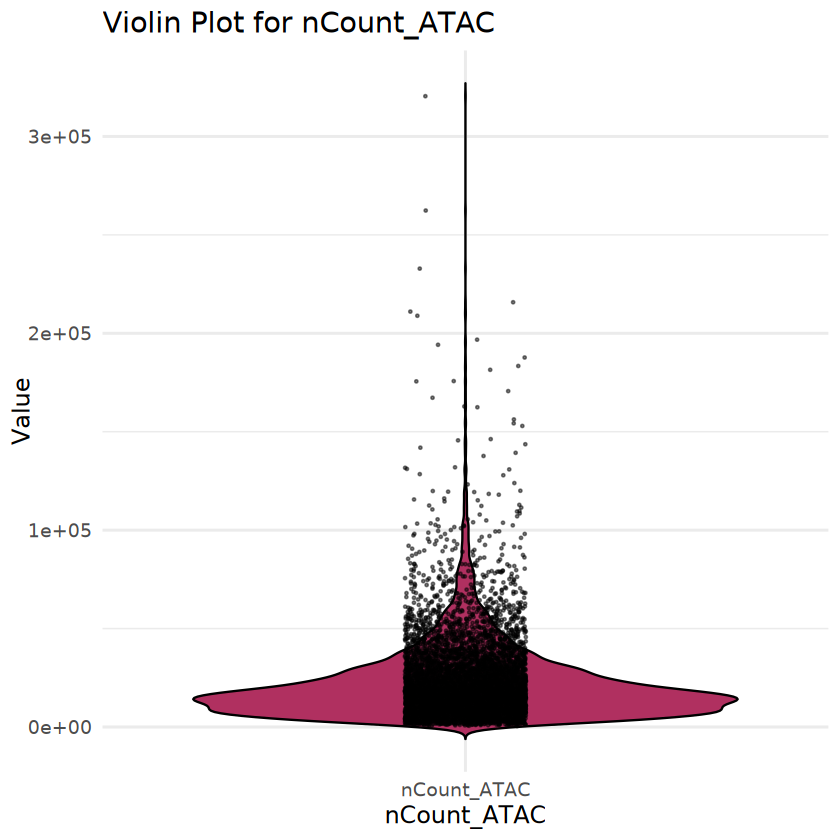

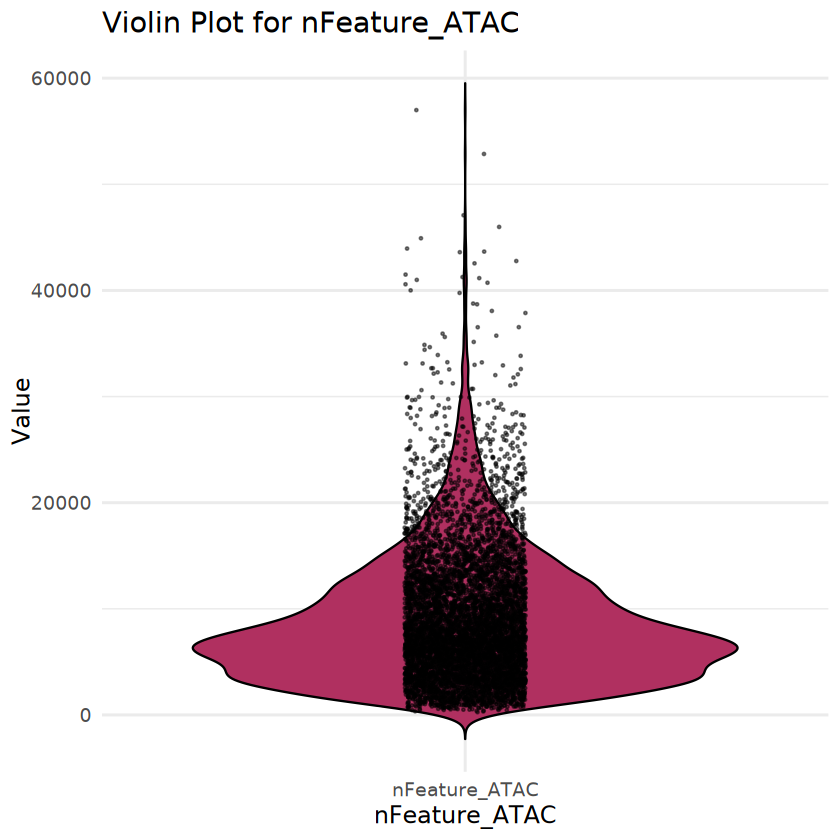

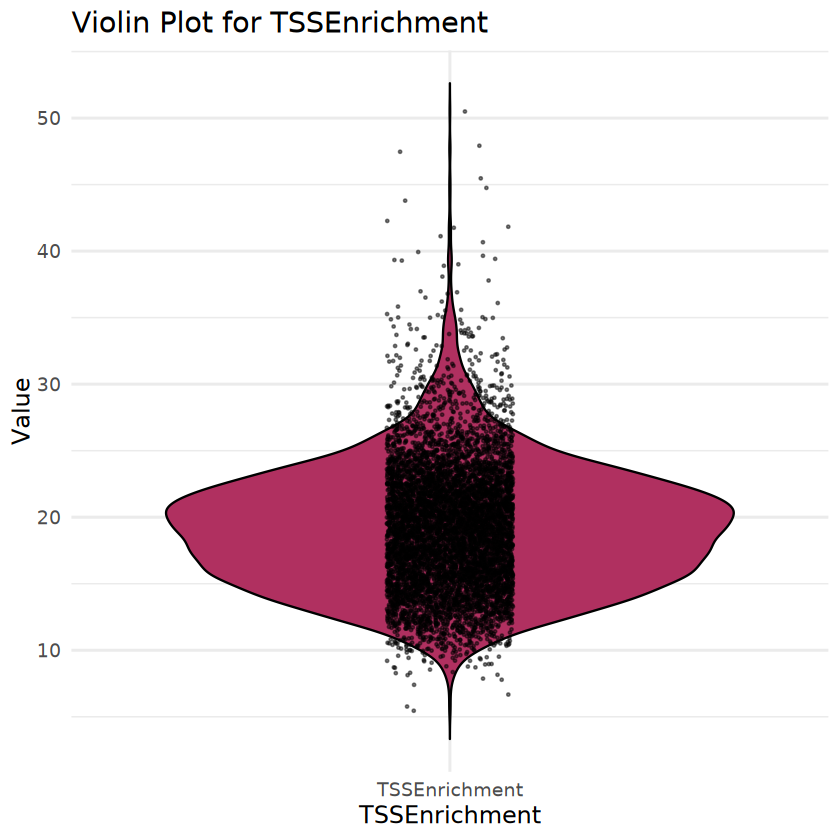

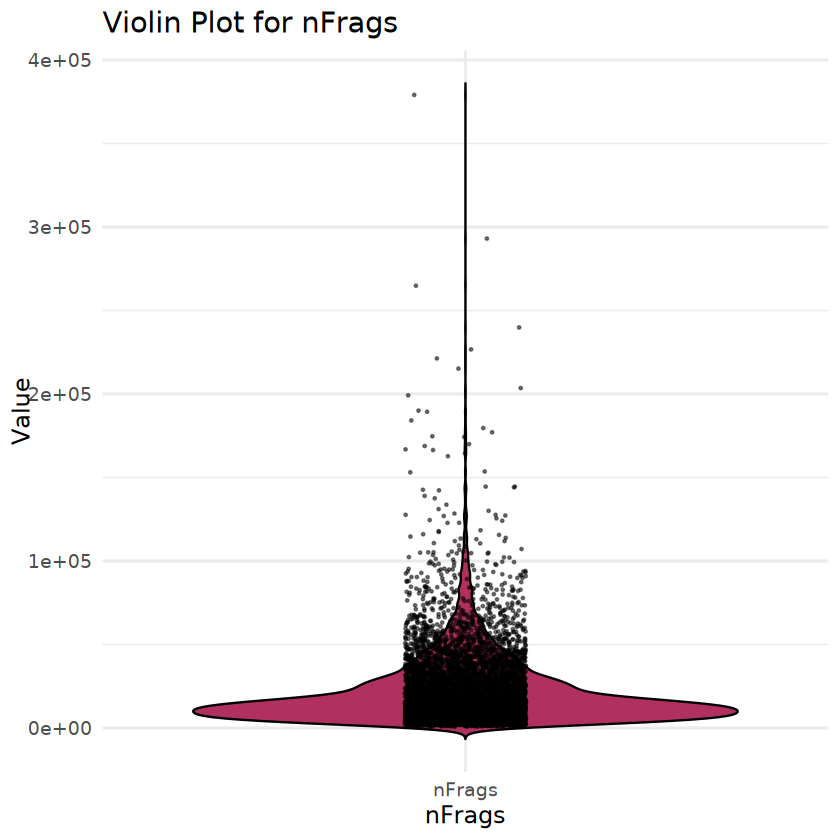

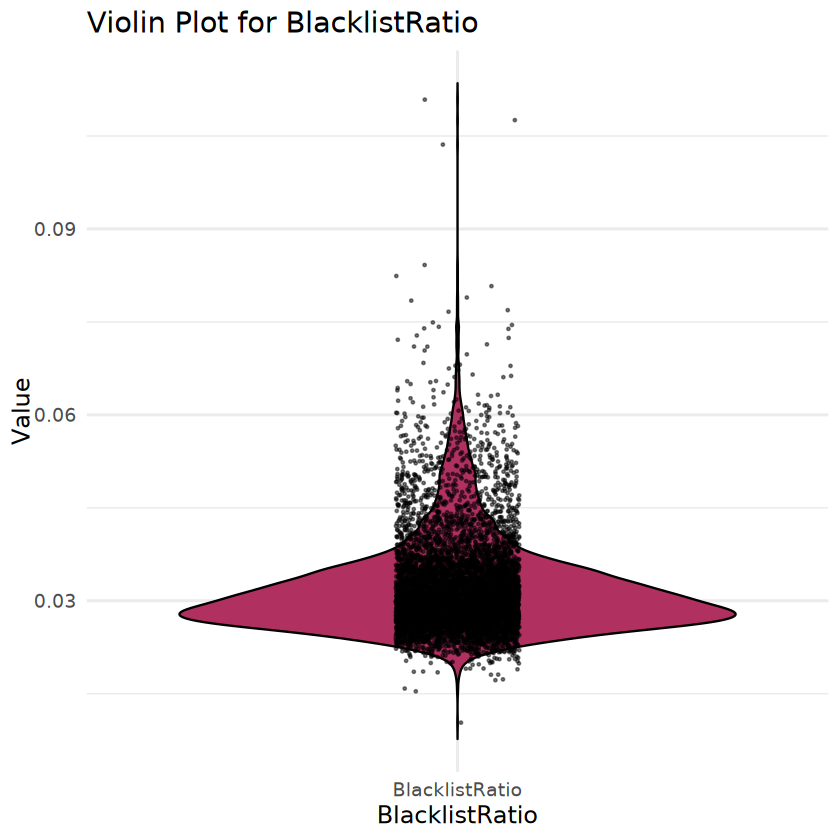

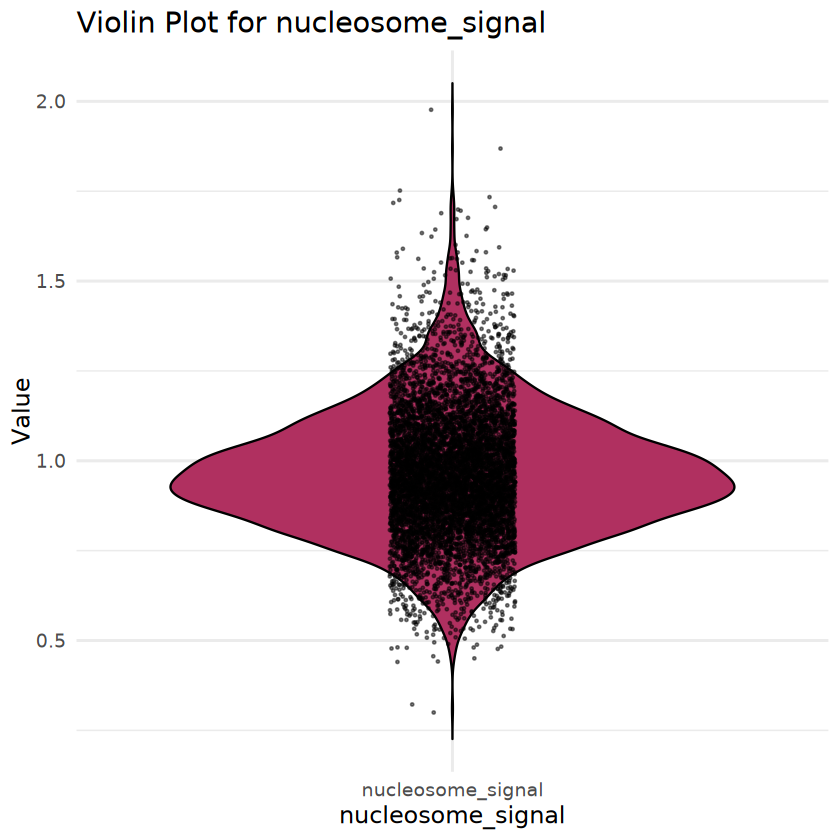

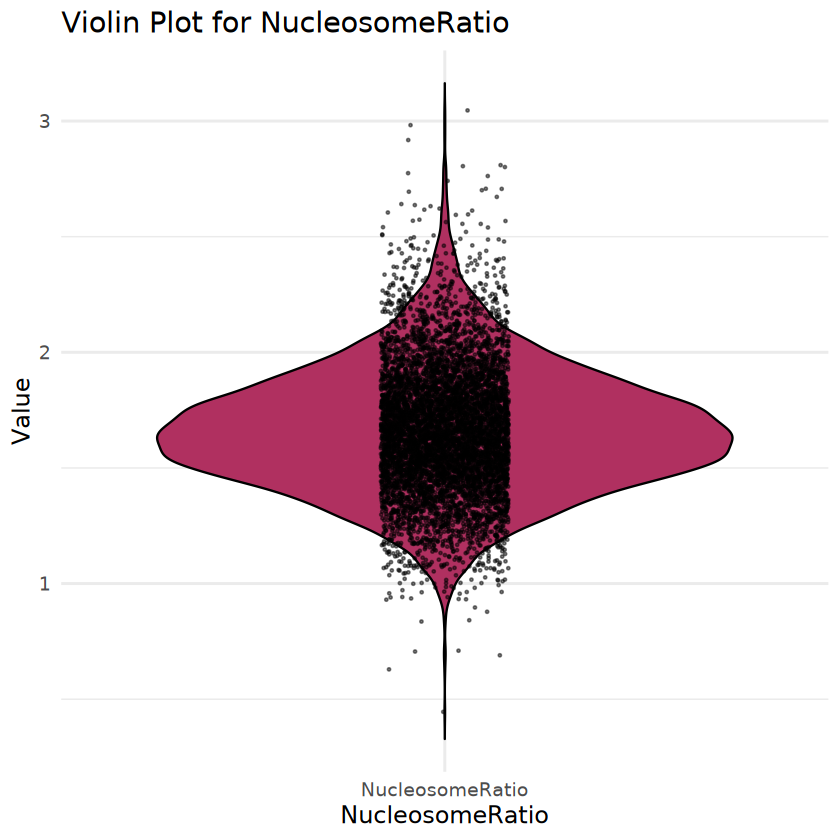

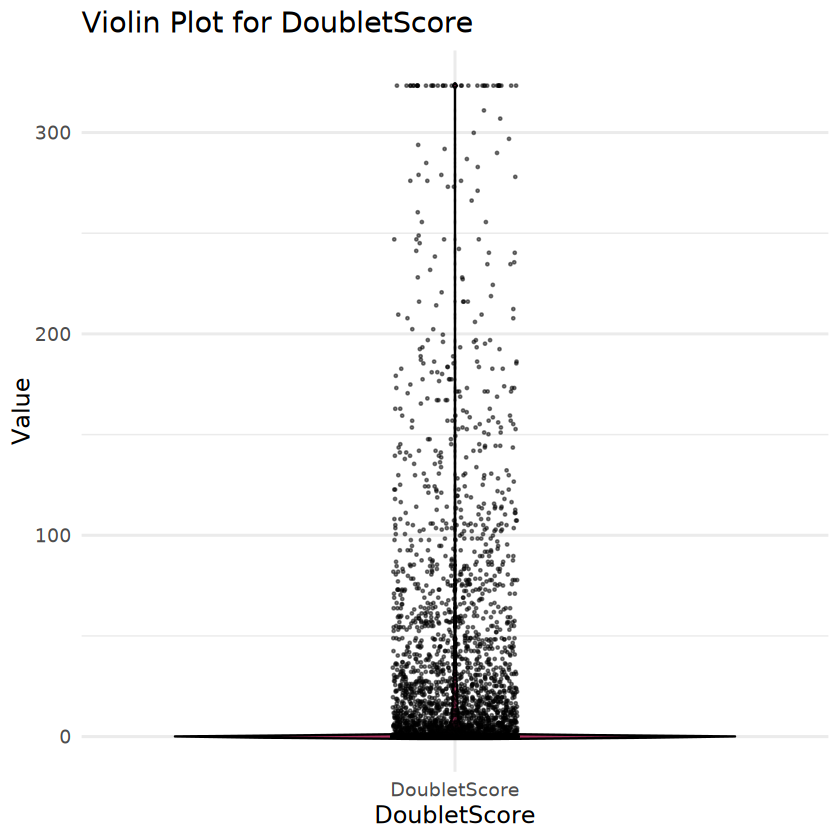

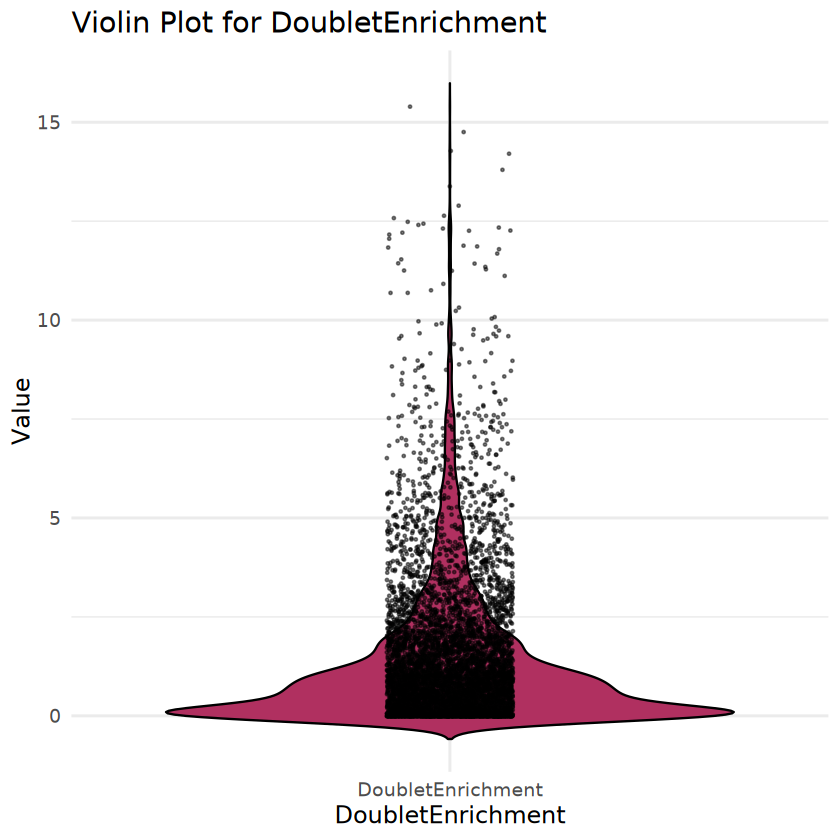

In [11]:
# Define the columns to plot
columns_to_plot <- c('nCount_ATAC', 'nFeature_ATAC', 'TSSEnrichment', 'nFrags',
                     'BlacklistRatio', 'nucleosome_signal', 'NucleosomeRatio','DoubletScore','DoubletEnrichment')

# Extract data from seurat_obj@meta.data
plot_data <- seurat_obj@meta.data

# Melt the data into a long format for plotting
plot_data_melted <- melt(plot_data, variable.name = "Feature", value.name = "Value")

# Create a list to store individual ggplot objects
plot_list <- list()
for (feature in columns_to_plot) {
  p <- ggplot(subset(plot_data_melted, Feature == feature), aes(x = Feature, y = Value)) +
    geom_violin(trim = FALSE, fill = "maroon", color = "black") +  # Violin plot
    geom_jitter(width = 0.1, color = "black", size = 0.3, alpha = 0.5) +  # Jittered points (black)
    theme_minimal(base_size = 14) +  # Larger base font size
    labs(title = paste("Violin Plot for", feature),
         x = feature,
         y = "Value")
  plot_list[[feature]] <- p
  print(p)
}
#grid.arrange(grobs = plot_list, ncol = 4, top = paste0(sample,"QC Metrics"))  # Add a main title

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c25755d66-Date-2025-01-30_Time-15-08-04.626214.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c25755d66-Date-2025-01-30_Time-15-08-04.626214.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c4f1002d5-Date-2025-01-30_Time-15-08-06.9286.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c4f1002d5-Date-2025-01-30_Time-15-08-06.9286.log



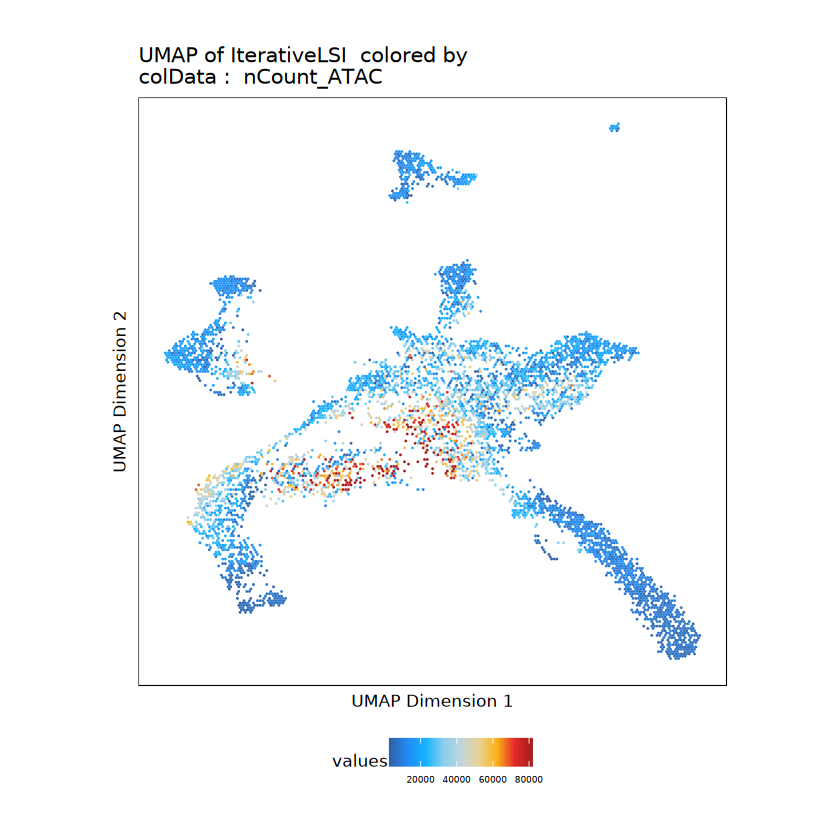

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c219de896-Date-2025-01-30_Time-15-08-08.32572.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c219de896-Date-2025-01-30_Time-15-08-08.32572.log



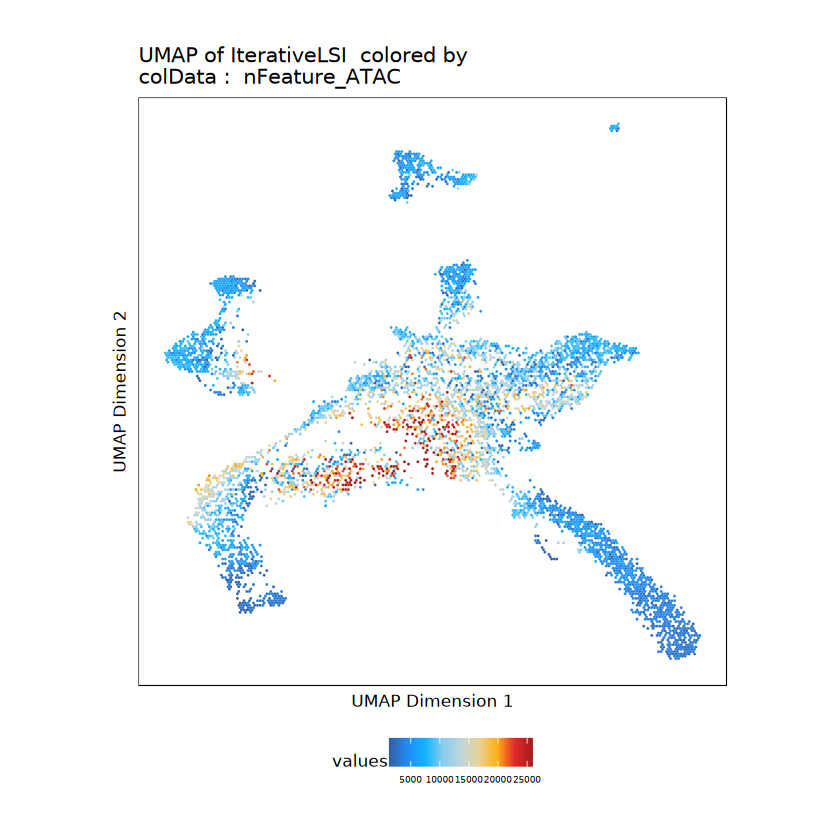

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c15c8a21b-Date-2025-01-30_Time-15-08-09.831825.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c15c8a21b-Date-2025-01-30_Time-15-08-09.831825.log



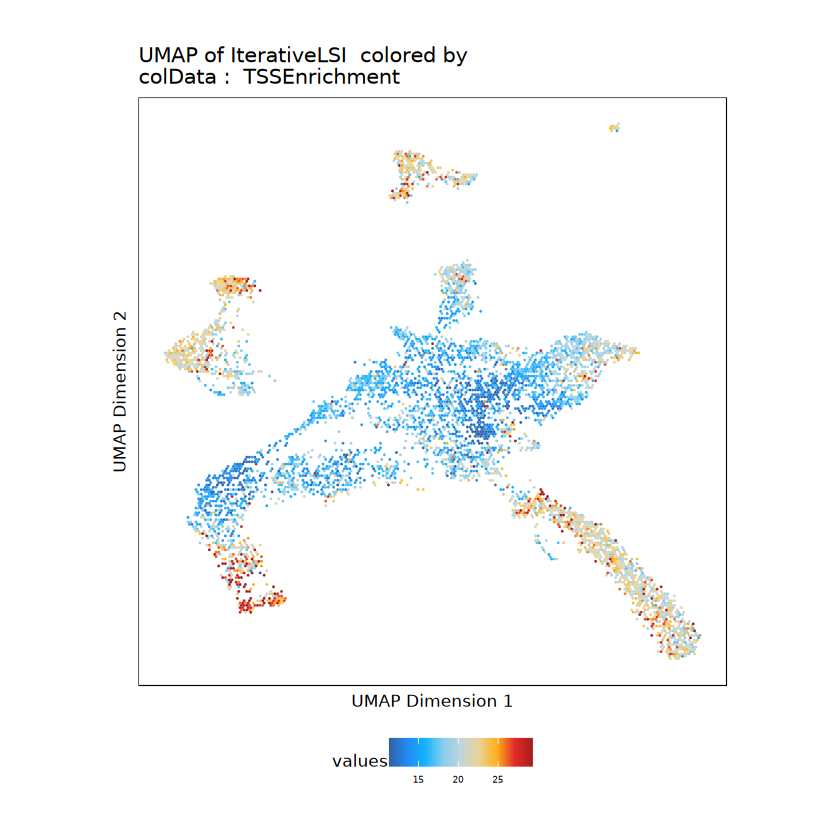

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c70658d0c-Date-2025-01-30_Time-15-08-11.34506.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c70658d0c-Date-2025-01-30_Time-15-08-11.34506.log



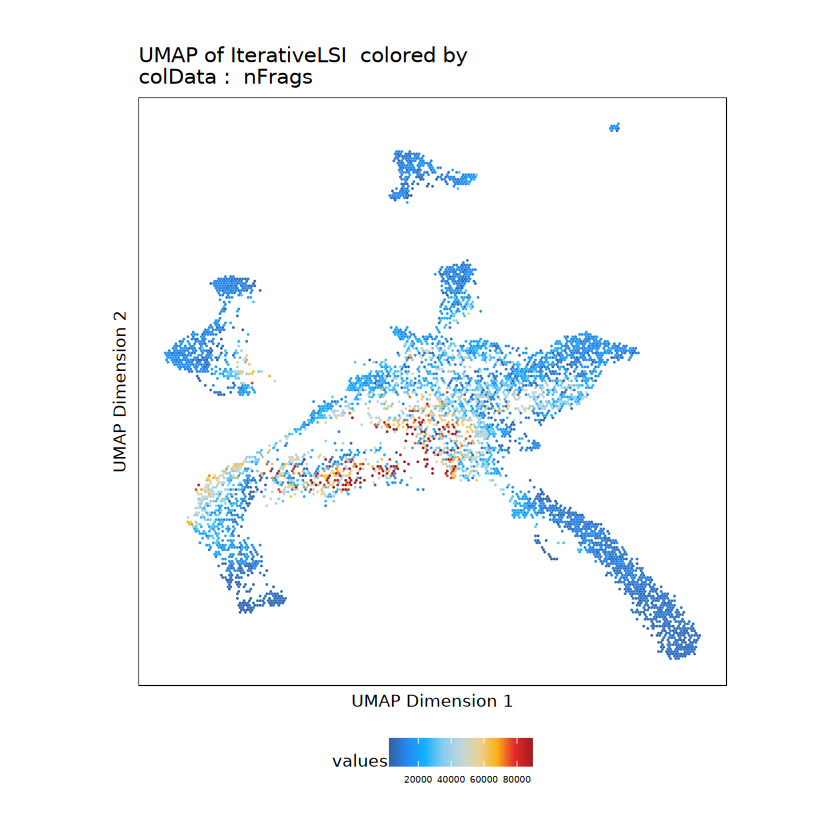

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c675b3e2b-Date-2025-01-30_Time-15-08-12.789157.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c675b3e2b-Date-2025-01-30_Time-15-08-12.789157.log



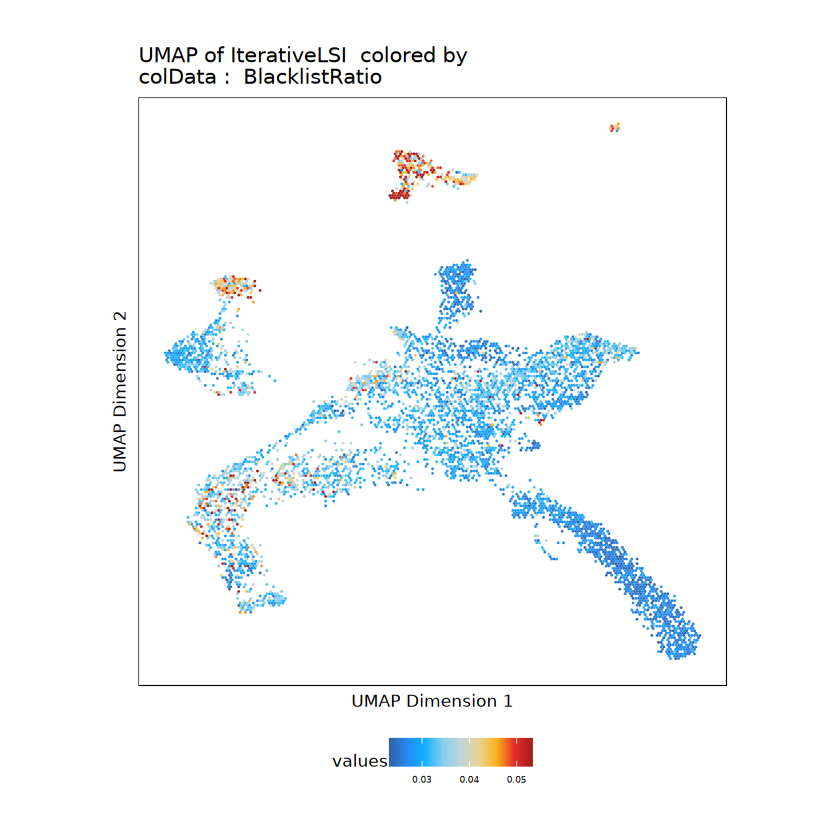

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c70d65ce9-Date-2025-01-30_Time-15-08-14.236825.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c70d65ce9-Date-2025-01-30_Time-15-08-14.236825.log



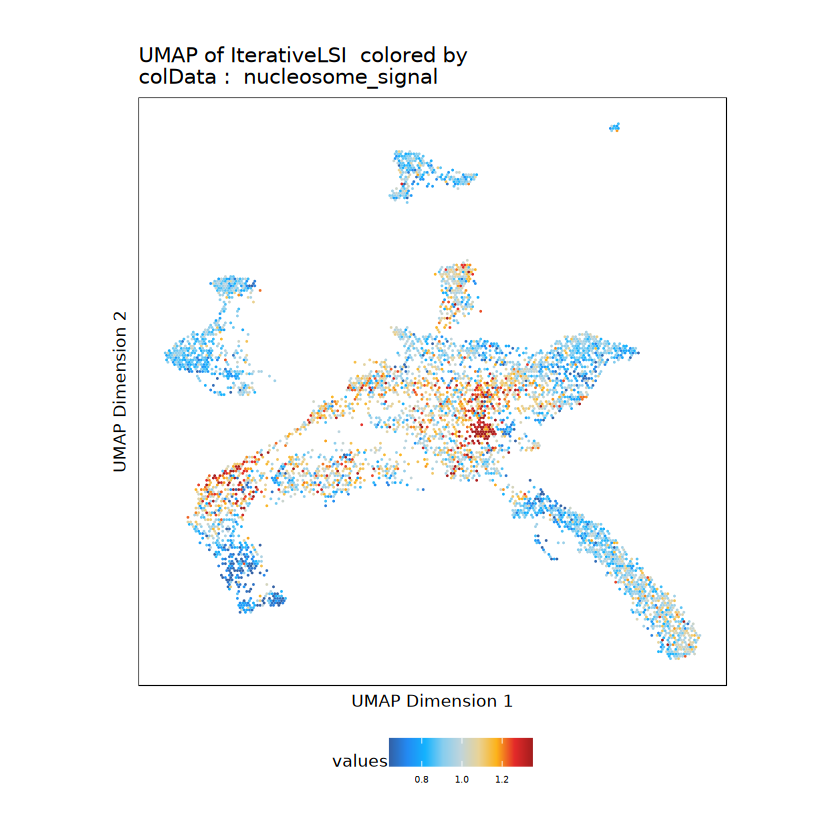

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c778dc0c5-Date-2025-01-30_Time-15-08-15.693936.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c778dc0c5-Date-2025-01-30_Time-15-08-15.693936.log



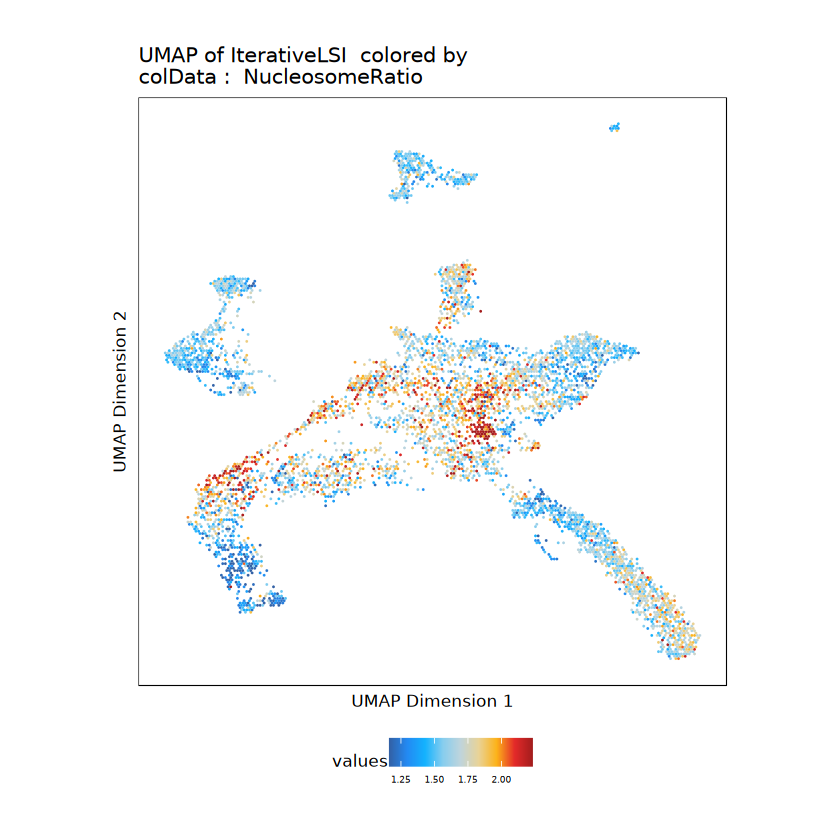

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c4fded8ae-Date-2025-01-30_Time-15-08-17.154607.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c4fded8ae-Date-2025-01-30_Time-15-08-17.154607.log



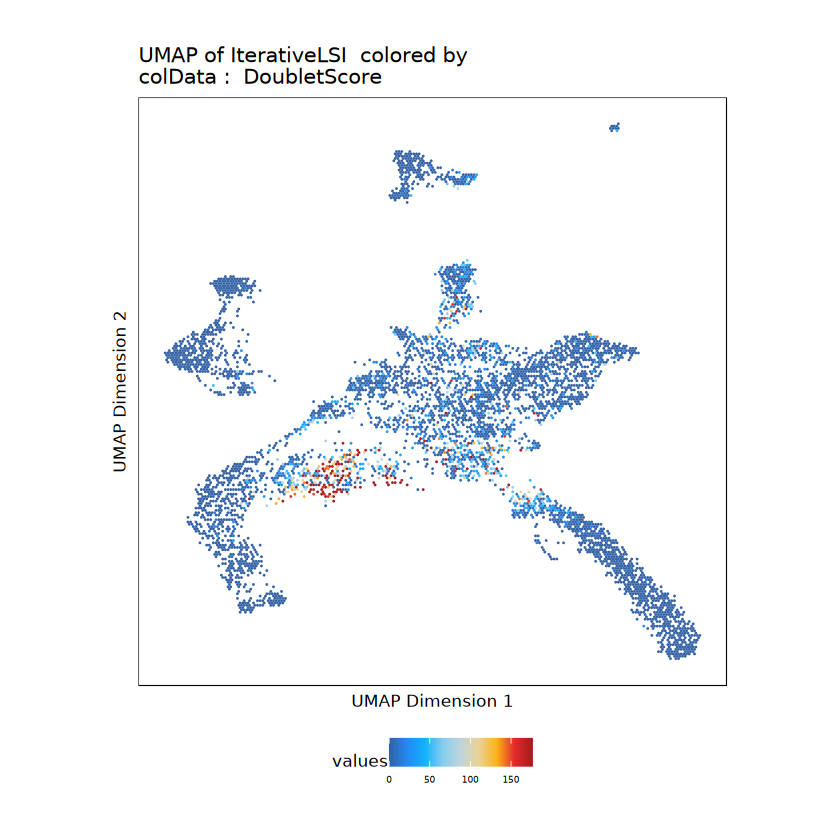

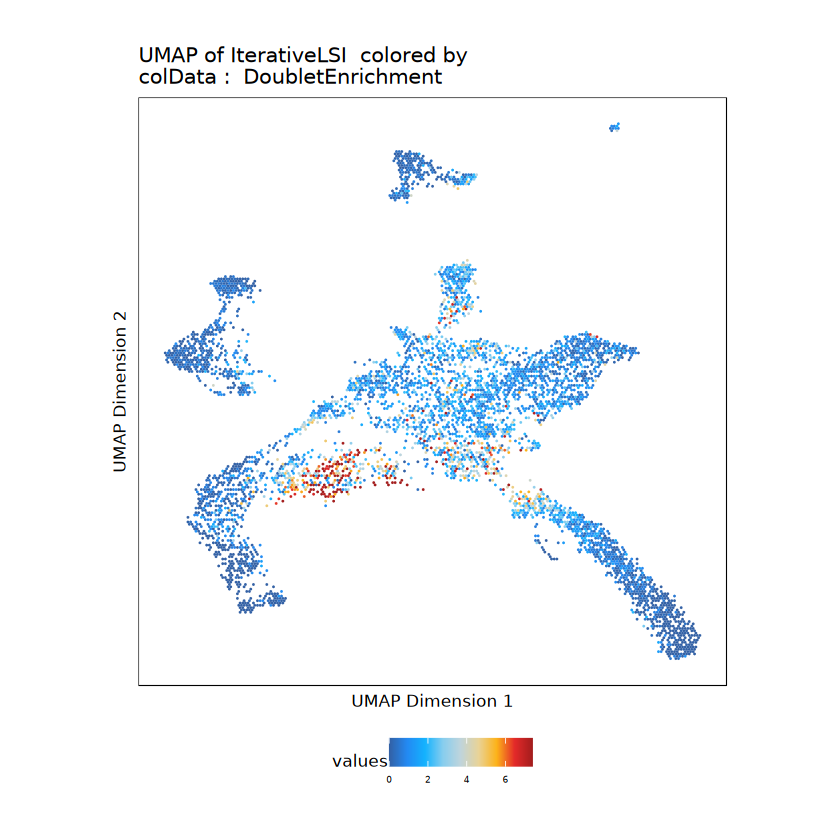

In [12]:
variables <- c('nCount_ATAC', 'nFeature_ATAC', 'TSSEnrichment', 'nFrags',
                     'BlacklistRatio', 'nucleosome_signal', 'NucleosomeRatio','DoubletScore','DoubletEnrichment')

plot_list2 <- lapply(variables, function(var) {
    p <- plotEmbedding(
      ArchRProj = proj, 
      colorBy = "cellColData", 
      name = var, 
      embedding = "UMAP"
    )
    p + 
      ggtitle(paste("UMAP of", var, proj_name)) +  # Title for each plot
      theme_minimal() +  # A clean minimal theme
      theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels
  print(p)
})

#grid.arrange(grobs = plot_list2, ncol = 3, top = paste0(sample,"QC Metrics"))

# Filtering Round 1

In [14]:
metadata_df <- seurat_obj@meta.data
filtered_metadata1 <- metadata_df[
  metadata_df$nCount_ATAC < 100000 & 
  metadata_df$nFeature_ATAC < 40000 & 
  metadata_df$TSSEnrichment > 4 & 
  metadata_df$TSSEnrichment < 45 & 
  metadata_df$nFrags < 100000 & 
  metadata_df$BlacklistRatio < 0.07 & 
  metadata_df$DoubletScore < 20 & 
  metadata_df$DoubletEnrichment < 10, 
  ]
dim(seurat_obj@meta.data)
dim(filtered_metadata1)

[1] 7160   55

[1] 5984   55

In [15]:
seurat_obj@meta.data$filter_status <- ifelse(rownames(seurat_obj@meta.data) %in% rownames(filtered_metadata1), "Included", "Excluded")
proj <- addCellColData(
        ArchRProj = proj,
        data = seurat_obj$filter_status,
        name = 'filter_status', 
        cells = seurat_obj$archr_barcodes,
        force = TRUE)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c6113573b-Date-2025-01-30_Time-15-12-22.908438.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c6113573b-Date-2025-01-30_Time-15-12-22.908438.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c3a0f5bc5-Date-2025-01-30_Time-15-12-24.386994.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c3a0f5bc5-Date-2025-01-30_Time-15-12-24.386994.log



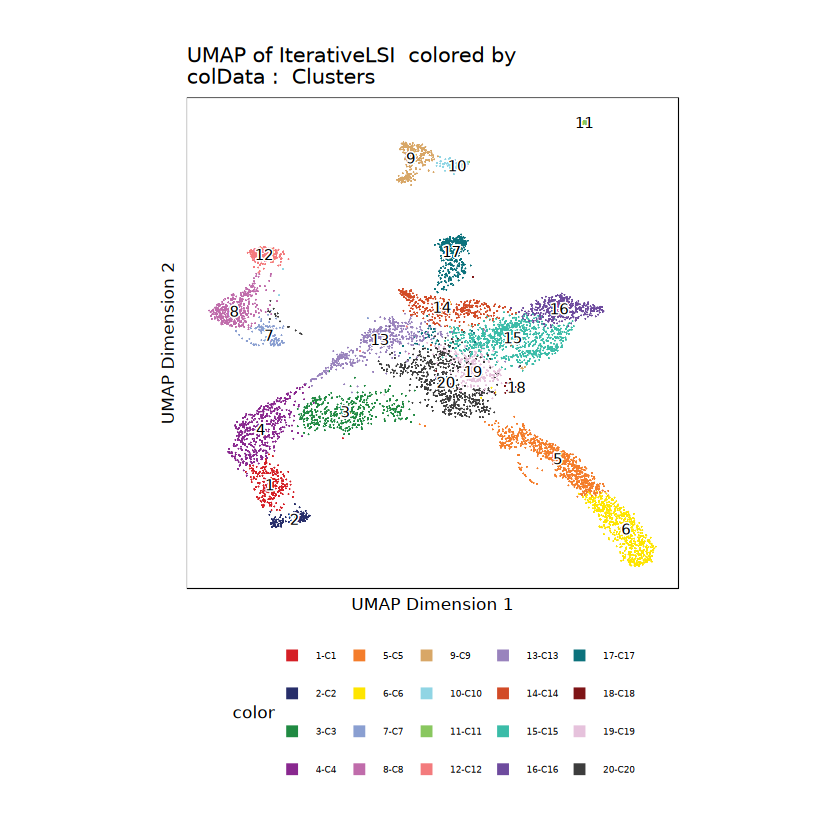

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c34820ce-Date-2025-01-30_Time-15-12-26.11315.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c34820ce-Date-2025-01-30_Time-15-12-26.11315.log



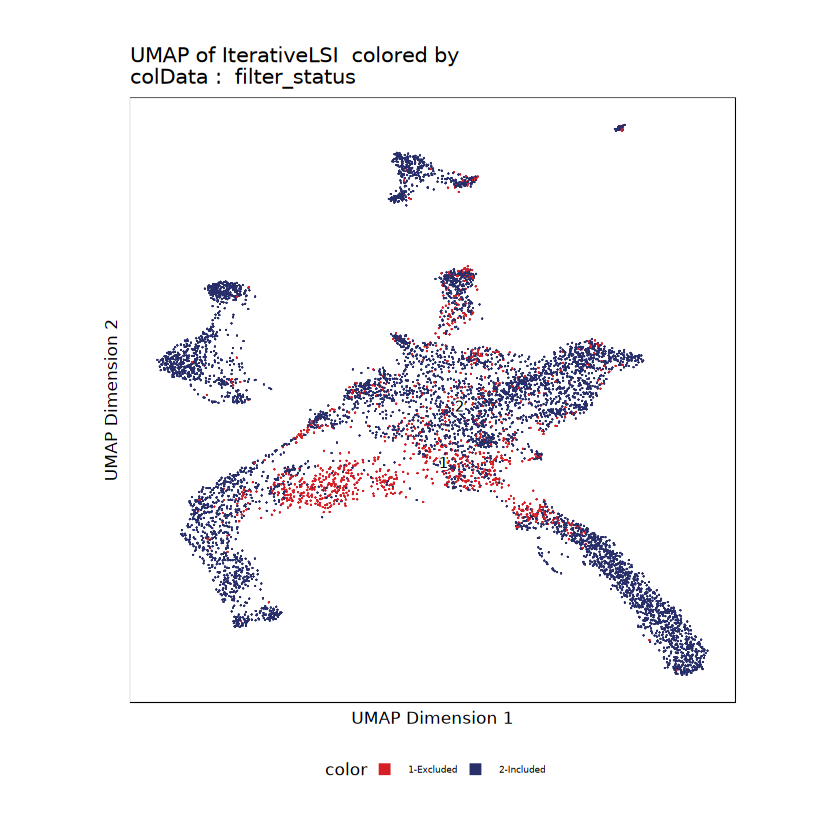

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c79afee2b-Date-2025-01-30_Time-15-12-27.484567.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c79afee2b-Date-2025-01-30_Time-15-12-27.484567.log



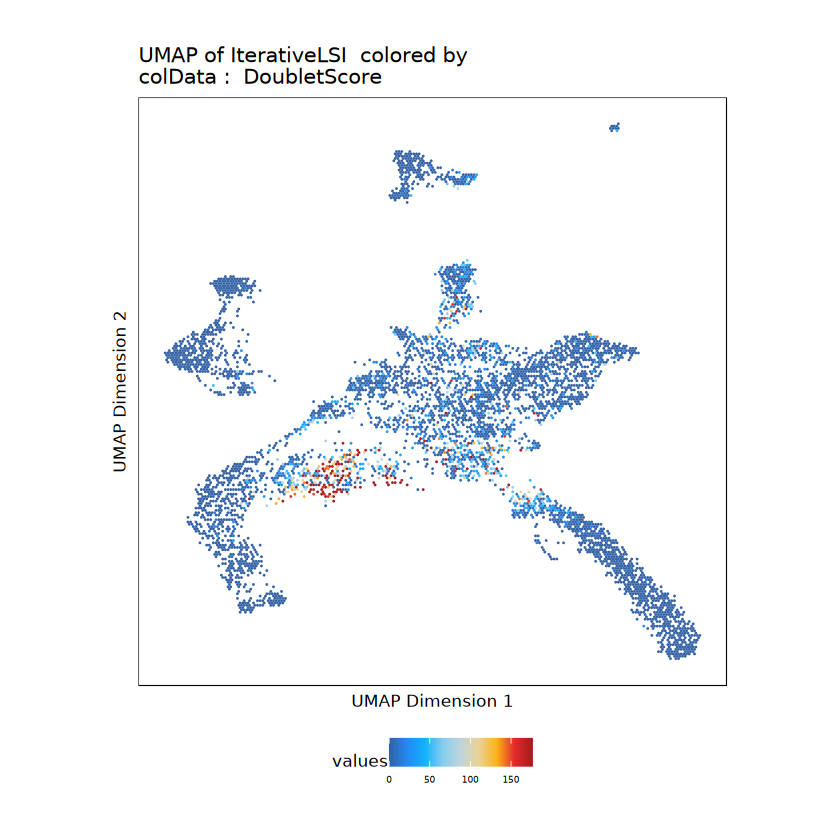

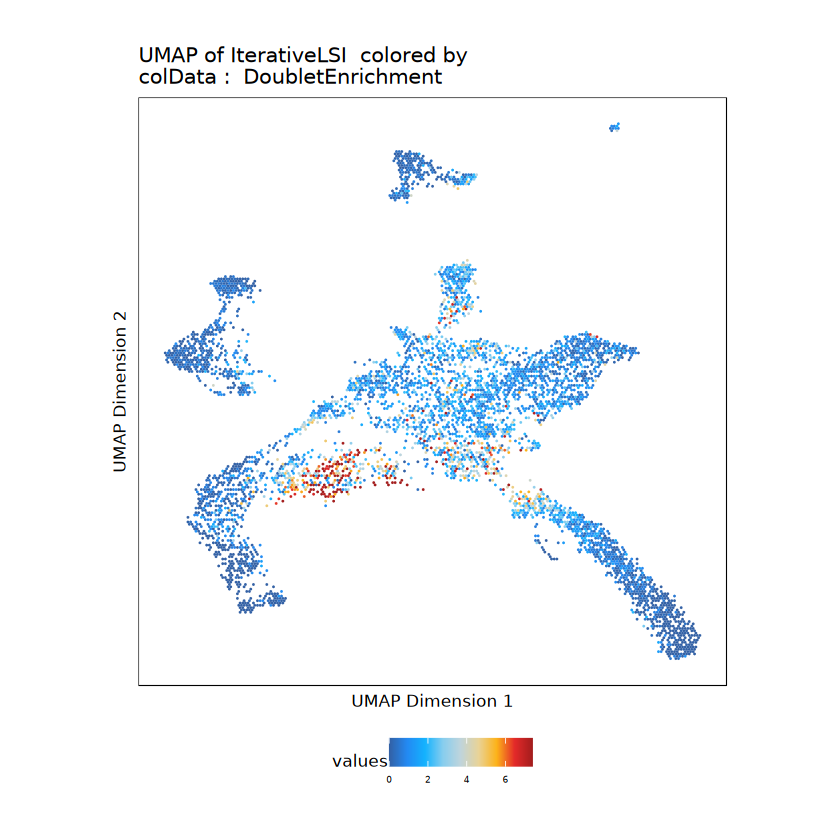

In [16]:
variables <- c('Clusters','filter_status','DoubletScore','DoubletEnrichment')
plot_list2 <- lapply(variables, function(var) {
    p <- plotEmbedding(
      ArchRProj = proj, 
      colorBy = "cellColData", 
      name = var, 
      embedding = "UMAP"
    )
    p + 
      ggtitle(paste("UMAP of", var, proj_name)) +  # Title for each plot
      theme_minimal() +  # A clean minimal theme
      theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels
  print(p)
})

In [17]:
proj <- saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [18]:
setwd(Archr_Dir)
sub_proj1 <- subsetArchRProject(
  ArchRProj = proj,
  cells = filtered_metadata1$archr_barcodes,
  outputDirectory = "filter_round1",
  dropCells = TRUE,
  force = TRUE
)

Copying ArchRProject to new outputDirectory : /athena/cayuga_0039/scratch/rer4011/projects/tori_atac_data/intermediate_results/per_sample_Archr/3_BCG_Ab_6wk_ArchR/filter_round1

Copying Arrow Files...

.copyArrow : Initializing Out ArrowFile

.copyArrow : Adding Metadata to Out ArrowFile

.copyArrow : Adding SubMatrices to Out ArrowFile

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 3): 3_BCG_Ab_6wk

Copying Other Files (2 of 3): Embeddings

Copying Other Files (3 of 3): IterativeLSI

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
               

In [19]:
write.csv(filtered_metadata1, file = "filtered_metadata1.csv", row.names = TRUE)

# Analyize Round 2

In [5]:
filtered_metadata1 <- read.csv("filtered_metadata1.csv")
sub_proj1 <- loadArchRProject(file.path(Archr_Dir,'filter_round1'))

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [95]:
sub_proj1


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /athena/cayuga_0039/scratch/rer4011/projects/tori_atac_data/intermediate_results/per_sample_Archr/12_BCG_24h_ArchR/filter_round1 
samples(1): 12_BCG_24h
sampleColData names(1): ArrowFiles
cellColData names(17): Sample TSSEnrichment ... DoubletEnrichment
  filter_status
numberOfCells(1): 9633
medianTSS(1): 22.106
medianFrags(1): 8137

In [20]:
sub_proj1 <- addIterativeLSI(ArchRProj = sub_proj1, useMatrix = "TileMatrix", name = "IterativeLSI",force=TRUE)
sub_proj1 <- addUMAP(sub_proj1, reducedDims = "IterativeLSI", name = "UMAP",force=TRUE)
sub_proj1 <- addClusters(input = sub_proj1, reducedDims = "IterativeLSI", name = "Clusters",force=TRUE)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-388b2c4b932962-Date-2025-01-30_Time-15-16-42.401936.log
If there is an issue, please report to github with logFile!

2025-01-30 15:16:42.731078 : Computing Total Across All Features, 0.001 mins elapsed.

2025-01-30 15:16:43.65344 : Computing Top Features, 0.016 mins elapsed.

###########
2025-01-30 15:16:46.115619 : Running LSI (1 of 2) on Top Features, 0.057 mins elapsed.
###########

2025-01-30 15:16:46.147968 : Creating Partial Matrix, 0.058 mins elapsed.

2025-01-30 15:17:17.90805 : Computing LSI, 0.587 mins elapsed.

2025-01-30 15:18:36.807892 : Identifying Clusters, 1.902 mins elapsed.

Warning message:
"Data is of class matrix. Coercing to dgCMatrix."
2025-01-30 15:18:47.530271 : Identified 6 Clusters, 2.081 mins elapsed.

2025-01-30 15:18:47.566115 : Saving LSI Iteration, 2.081 mins elapsed.




************************************************************
2025-01-30 15:19:10.798239 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-388b2c4b932962-Date-2025-01-30_Time-15-16-42.401936.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2025-01-30 15:19:10.800788 : Creating Cluster Matrix on the total Group Features, 2.469 mins elapsed.

2025-01-30 15:20:36.962145 : Computing Variable Features, 3.905 mins elapsed.

###########
2025-01-30 15:20:37.273292 : Running LSI (2 of 2) on Variable Features, 3.91 mins elapsed.
###########

2025-01-30 15:20:37.317136 : Creating Partial Matrix, 3.91 mins elapsed.

2025-01-30 15:21:17.448251 : Computing LSI, 4.579 mins elapsed.

2025-01-30 15:22:18.713129 : Finished Running IterativeLSI, 5.6 mins elapsed.

15:22:18 UMAP embedding parameters a = 0.7669 b = 1.223

15:22:18 Read 5984 rows and found 30 numeric columns

15:22:18 Using Annoy for neighbor search, n_neighbors = 40

15:22:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:22:19 Writing NN index file to t

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5984
Number of edges: 252049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8953
Number of communities: 17
Elapsed time: 0 seconds


2025-01-30 15:22:46.459236 : Testing Outlier Clusters, 0.158 mins elapsed.

2025-01-30 15:22:46.468353 : Assigning Cluster Names to 17 Clusters, 0.158 mins elapsed.

2025-01-30 15:22:46.52616 : Finished addClusters, 0.159 mins elapsed.



In [21]:
sub_proj1 <- saveArchRProject(ArchRProj = sub_proj1)
archr_metadata1 <- getCellColData(sub_proj1)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

# Plot QC metrics

No id variables; using all as measure variables



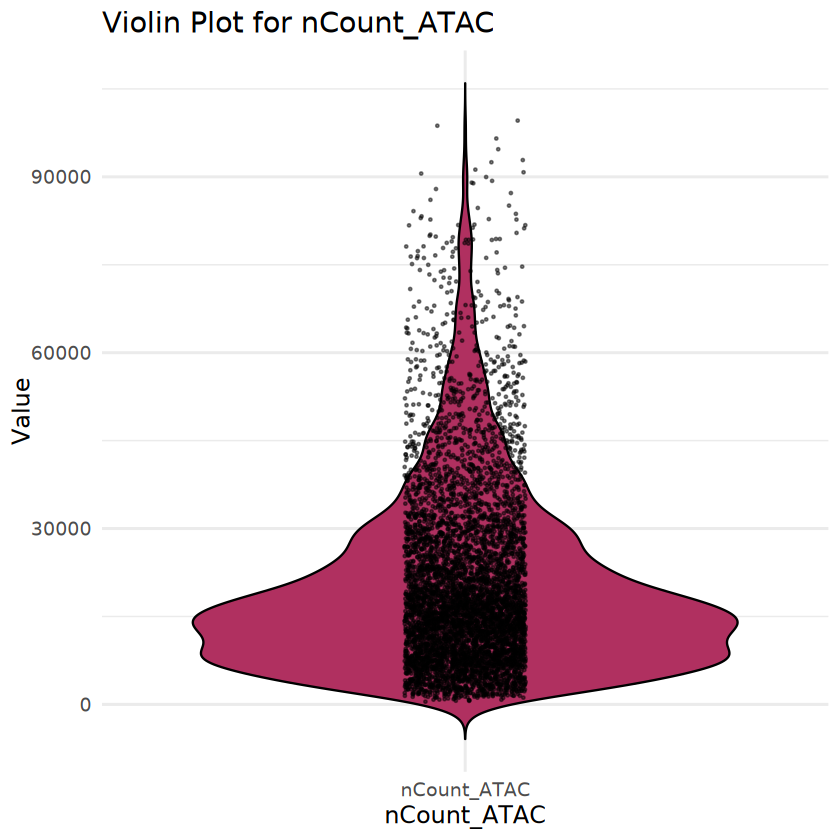

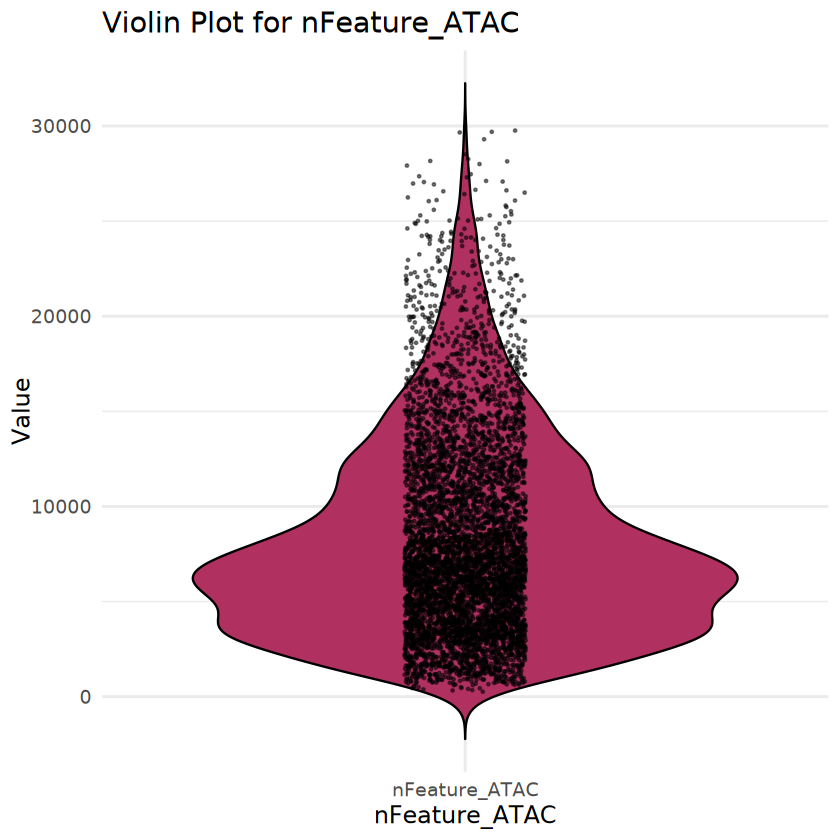

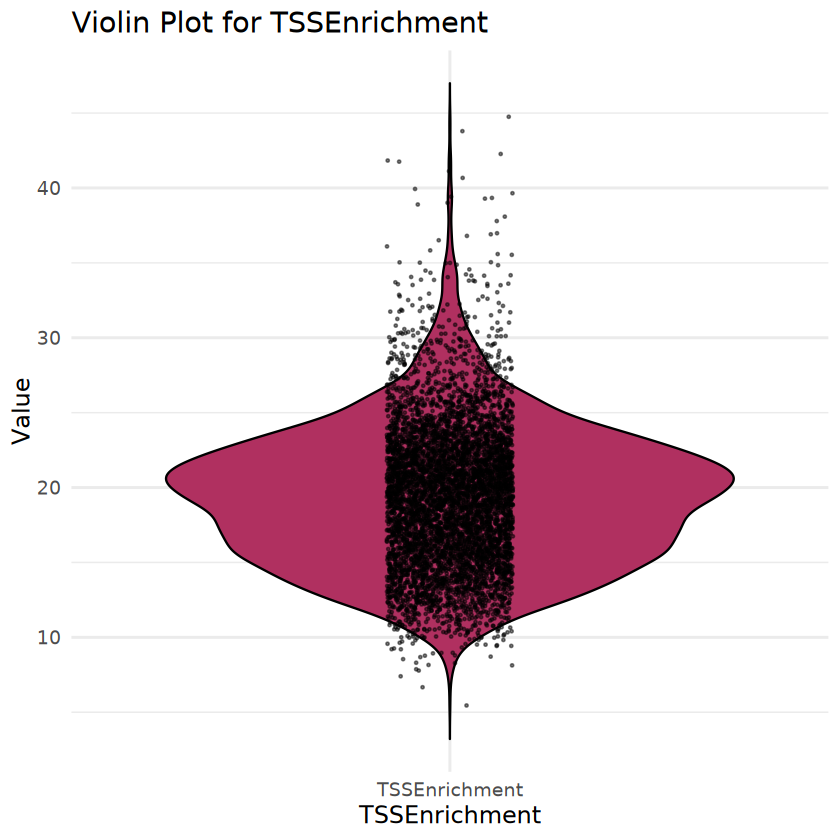

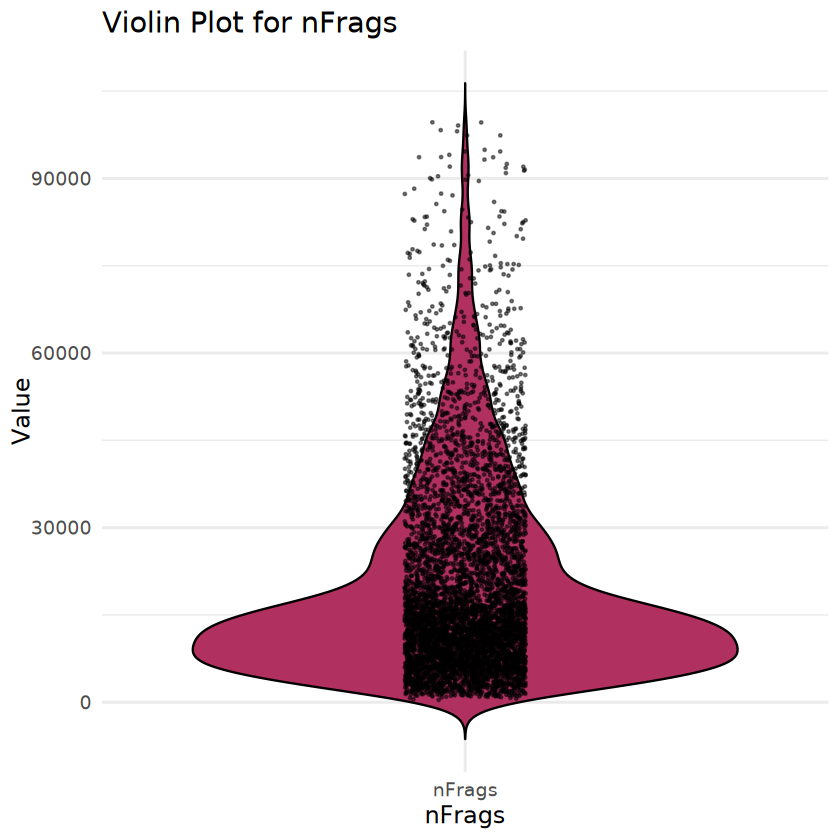

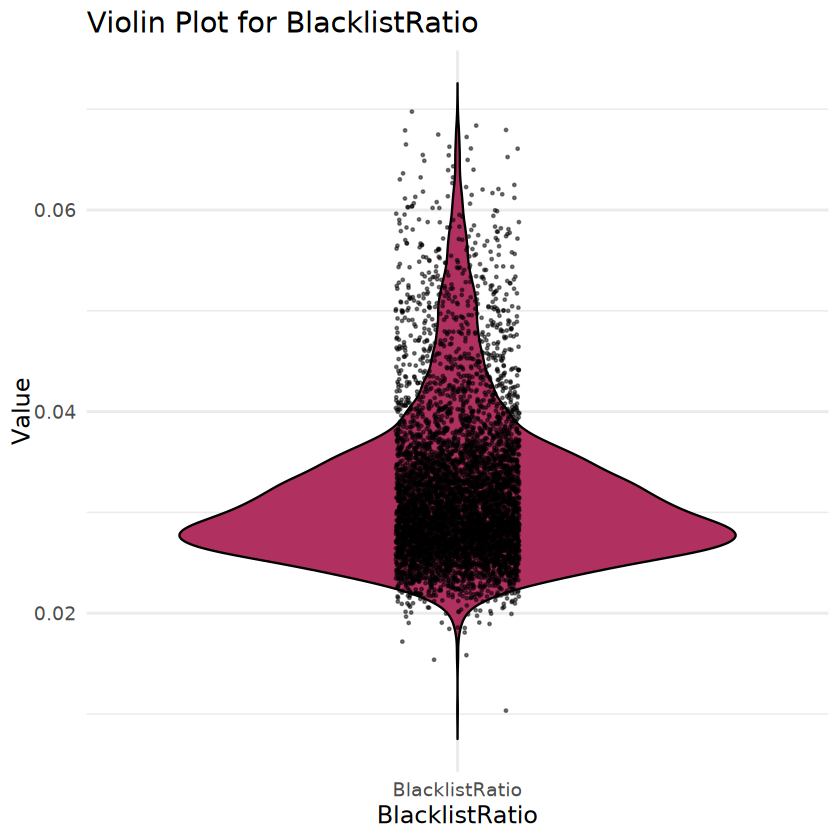

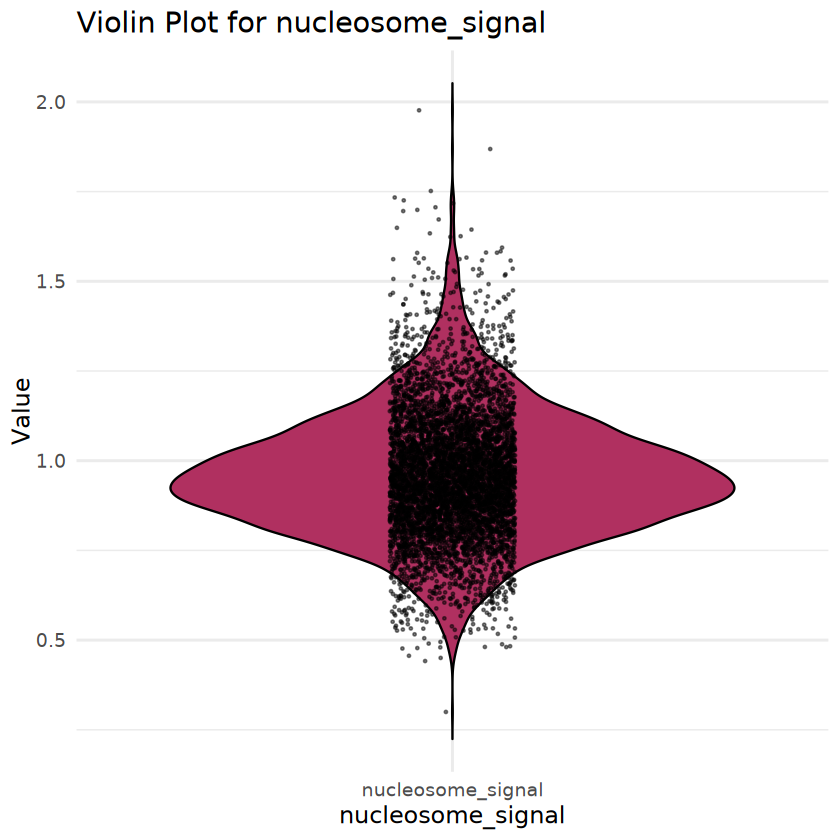

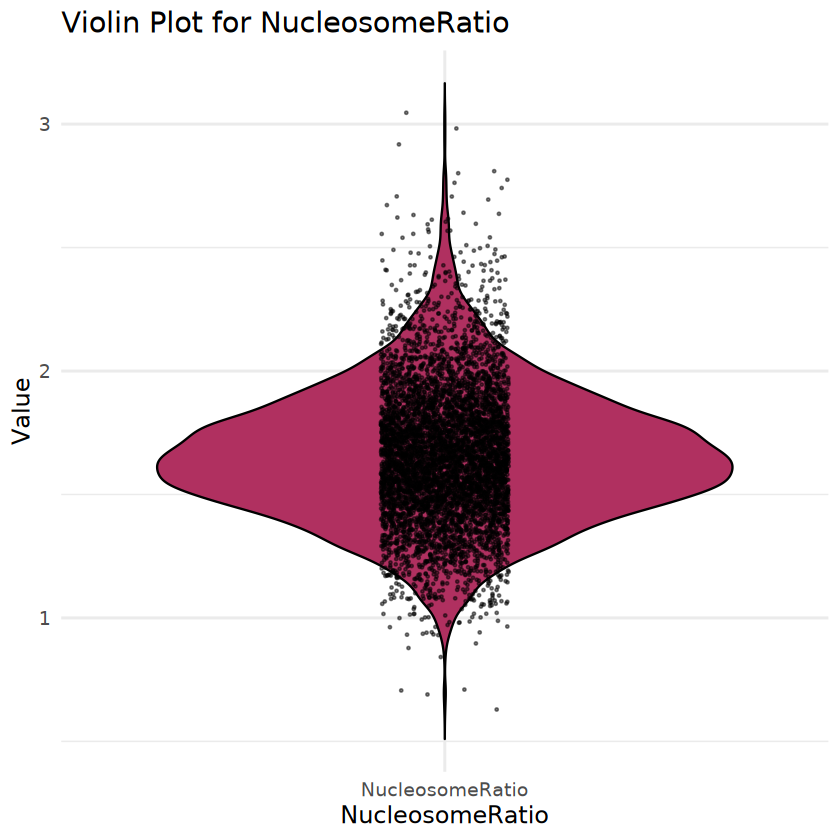

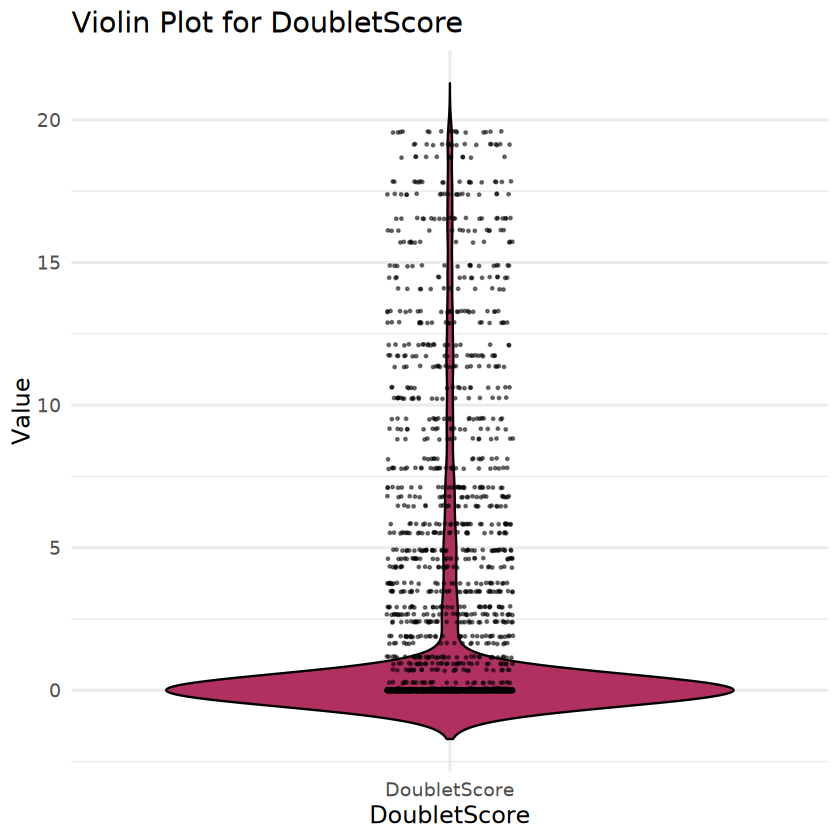

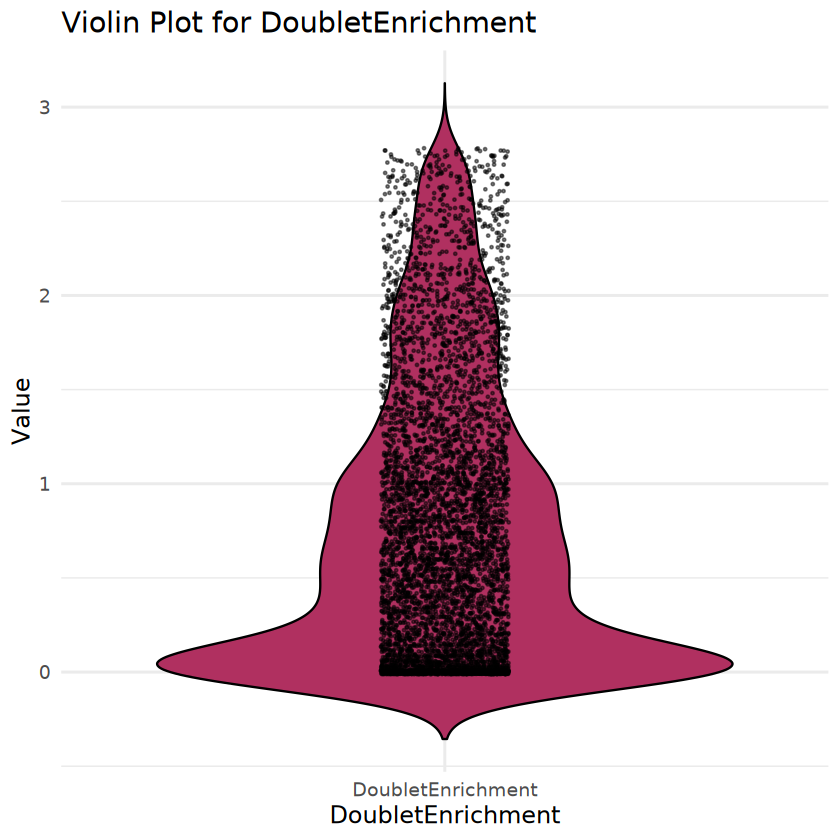

In [22]:
# Define the columns to plot
columns_to_plot <- c('nCount_ATAC', 'nFeature_ATAC', 'TSSEnrichment', 'nFrags',
                     'BlacklistRatio', 'nucleosome_signal', 'NucleosomeRatio','DoubletScore','DoubletEnrichment')

# Extract data from seurat_obj@meta.data
plot_data <- filtered_metadata1[, columns_to_plot]

# Melt the data into a long format for plotting
plot_data_melted <- melt(plot_data, variable.name = "Feature", value.name = "Value")

# Create a list to store individual ggplot objects
plot_list <- list()
for (feature in columns_to_plot) {
  p <- ggplot(subset(plot_data_melted, Feature == feature), aes(x = Feature, y = Value)) +
    geom_violin(trim = FALSE, fill = "maroon", color = "black") +  # Violin plot
    geom_jitter(width = 0.1, color = "black", size = 0.3, alpha = 0.5) +  # Jittered points (black)
    theme_minimal(base_size = 14) +  # Larger base font size
    labs(title = paste("Violin Plot for", feature),
         x = feature,
         y = "Value")
  plot_list[[feature]] <- p
  print(p)
}
#grid.arrange(grobs = plot_list, ncol = 4, top = paste0(sample,"QC Metrics"))  # Add a main title

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c70bb92b9-Date-2025-01-30_Time-15-22-53.679173.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c70bb92b9-Date-2025-01-30_Time-15-22-53.679173.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c21ced430-Date-2025-01-30_Time-15-22-55.486891.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c21ced430-Date-2025-01-30_Time-15-22-55.486891.log



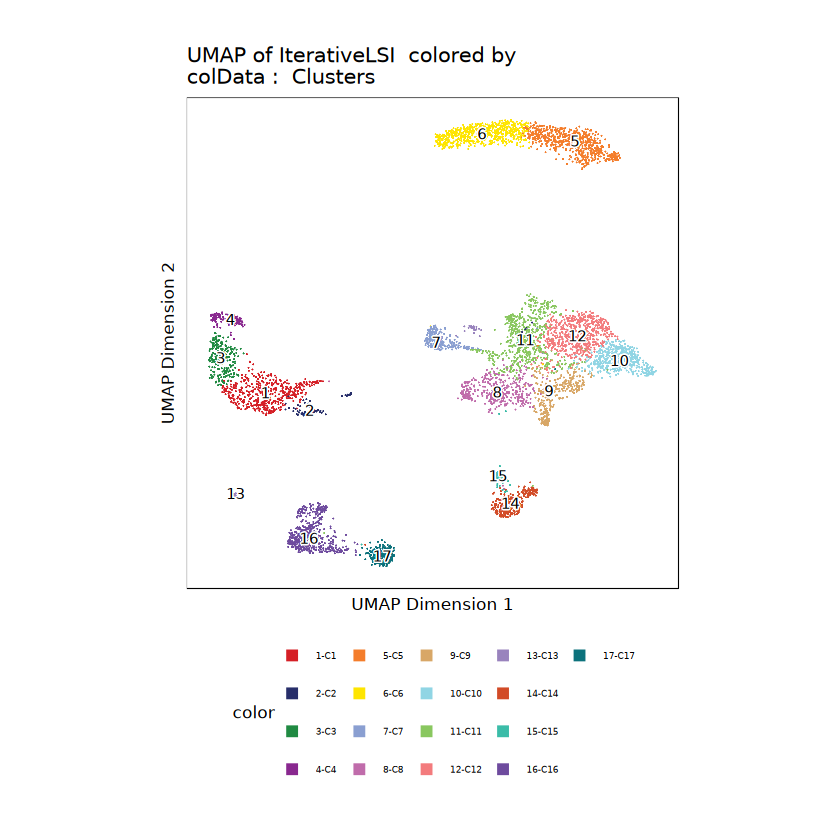

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c74532e1b-Date-2025-01-30_Time-15-22-56.669669.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c74532e1b-Date-2025-01-30_Time-15-22-56.669669.log



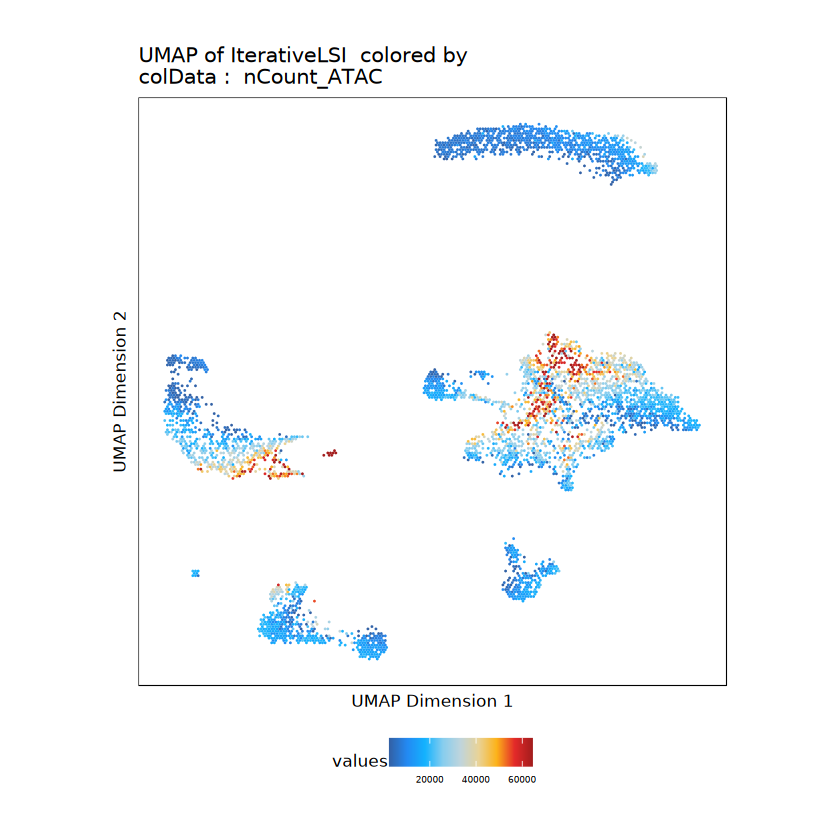

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c13df834-Date-2025-01-30_Time-15-22-58.349923.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c13df834-Date-2025-01-30_Time-15-22-58.349923.log



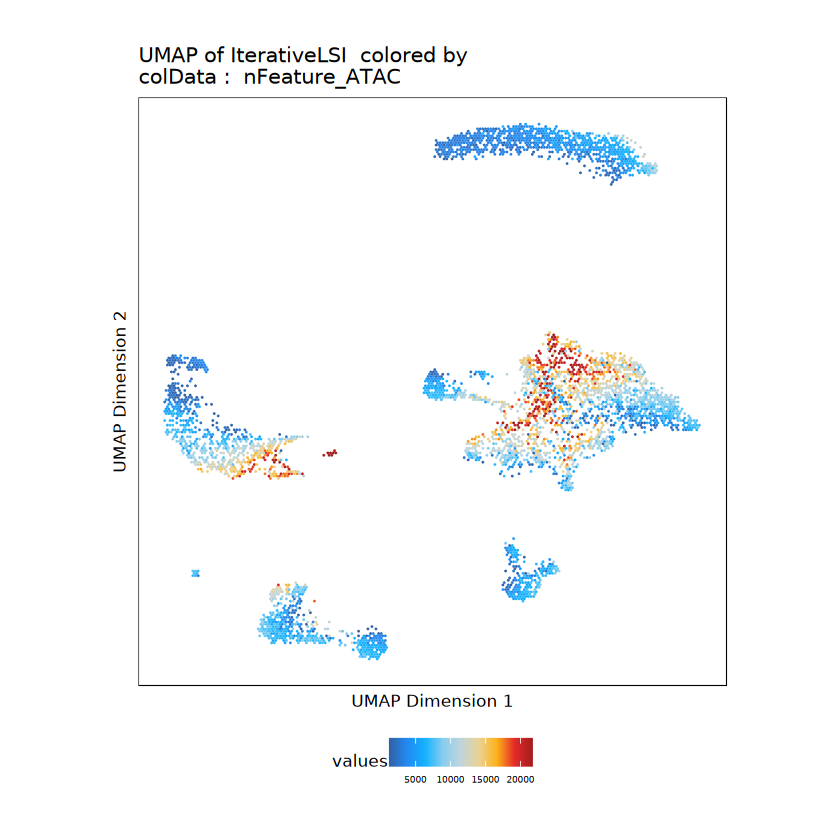

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c1ccff913-Date-2025-01-30_Time-15-22-59.42949.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c1ccff913-Date-2025-01-30_Time-15-22-59.42949.log



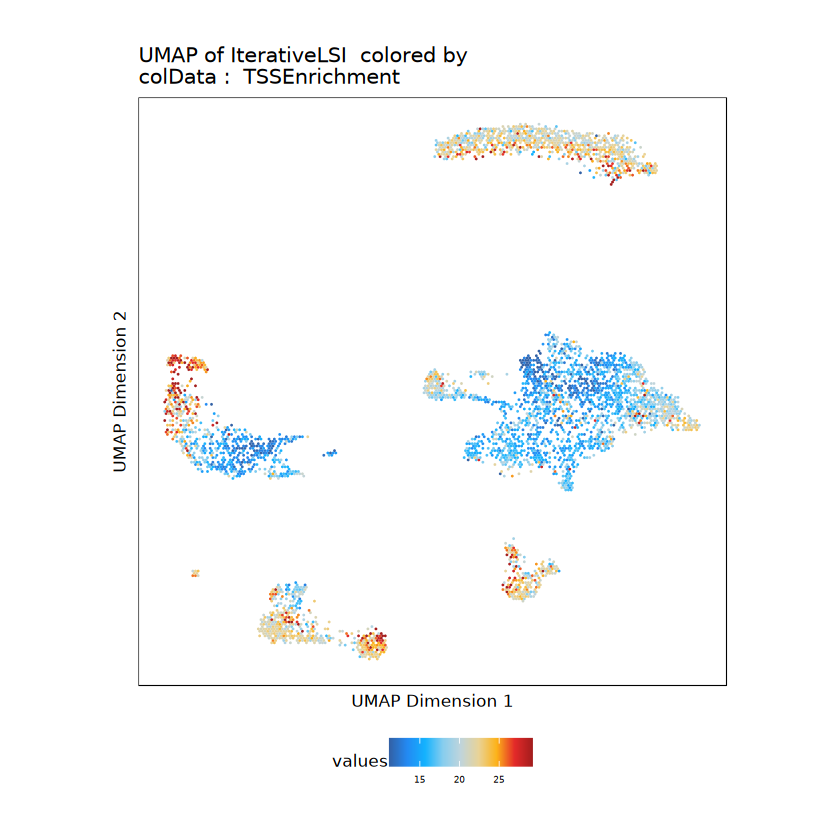

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c4575a70e-Date-2025-01-30_Time-15-23-00.696024.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c4575a70e-Date-2025-01-30_Time-15-23-00.696024.log



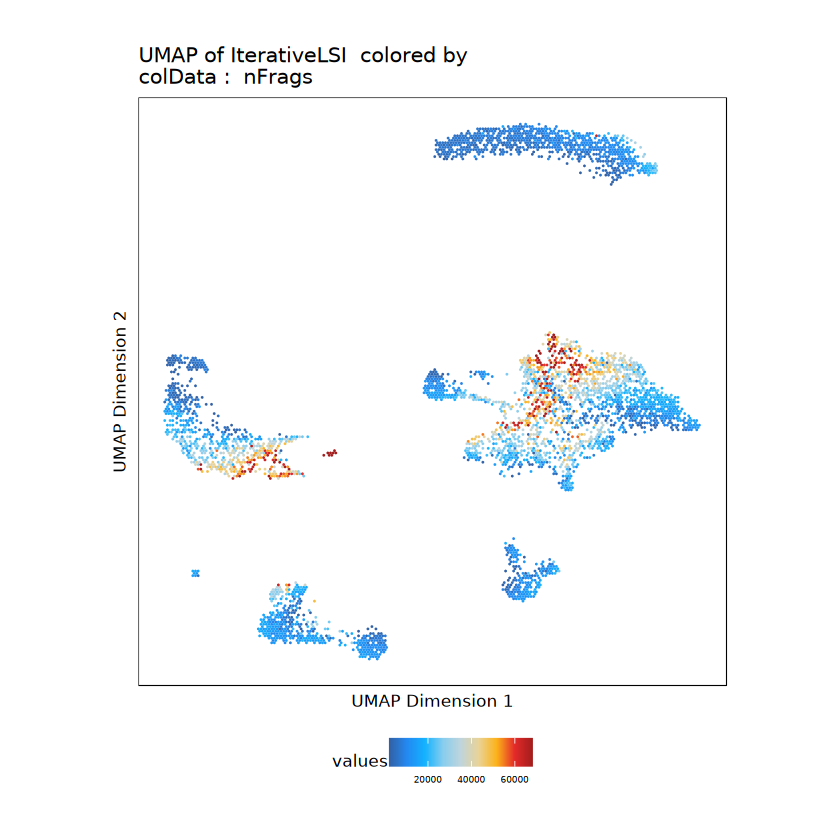

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c46cc8d2a-Date-2025-01-30_Time-15-23-01.760906.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c46cc8d2a-Date-2025-01-30_Time-15-23-01.760906.log



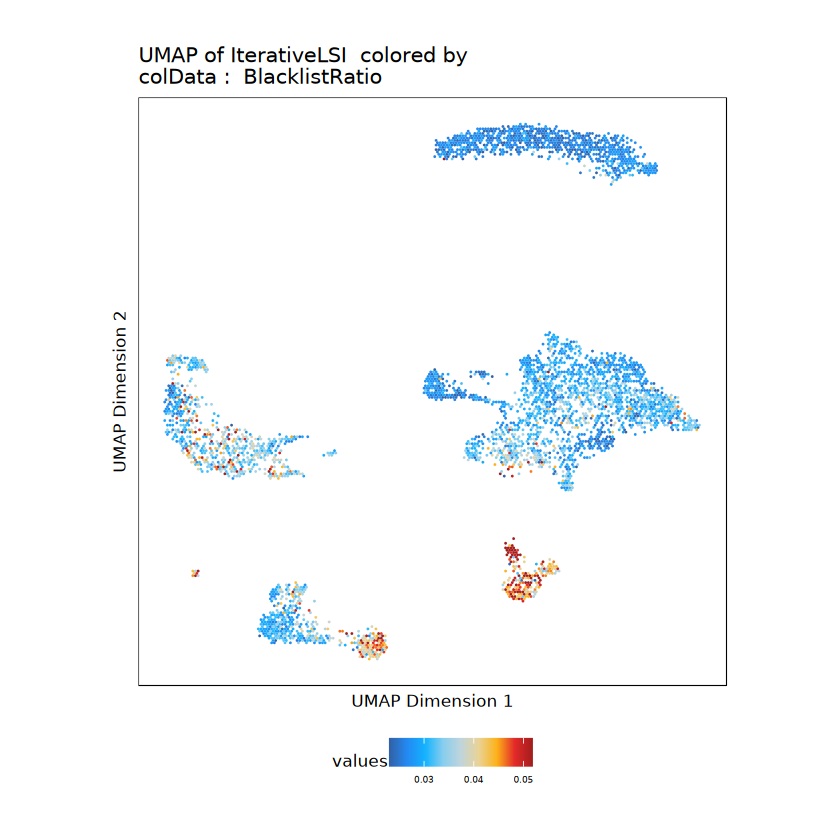

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c2f0df3b6-Date-2025-01-30_Time-15-23-02.828895.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c2f0df3b6-Date-2025-01-30_Time-15-23-02.828895.log



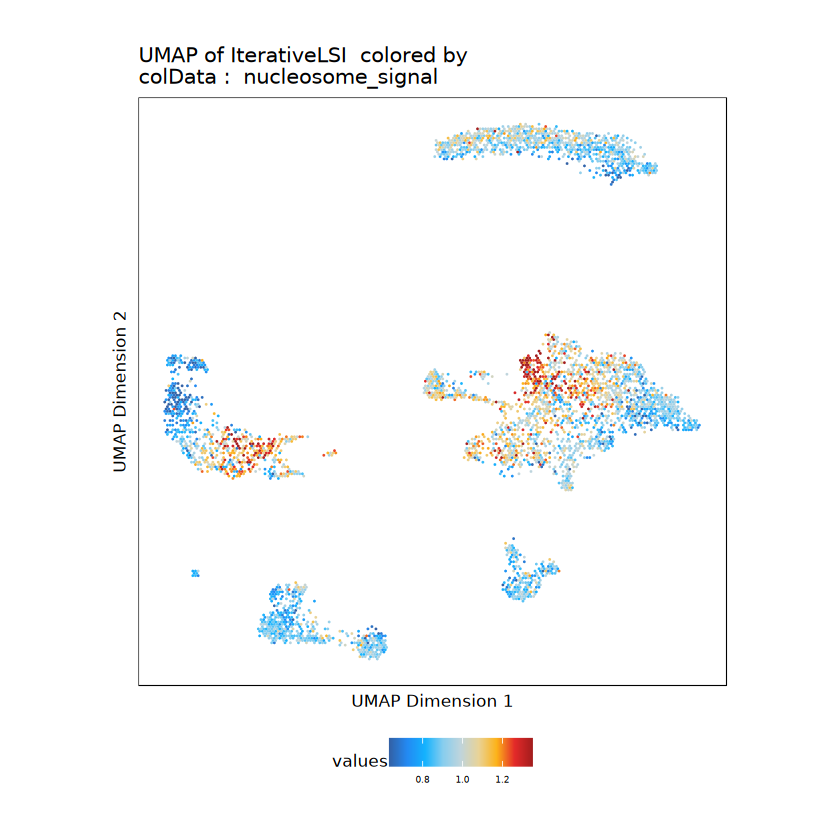

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c78462bb1-Date-2025-01-30_Time-15-23-04.310326.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c78462bb1-Date-2025-01-30_Time-15-23-04.310326.log



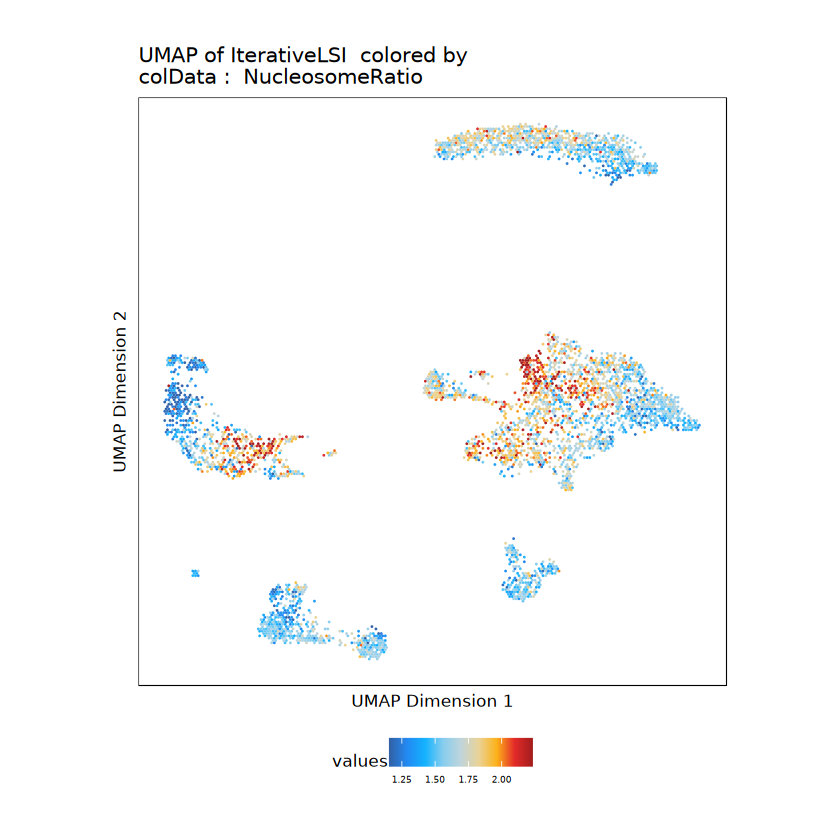

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-388b2c15f0ef3c-Date-2025-01-30_Time-15-23-05.352757.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-388b2c15f0ef3c-Date-2025-01-30_Time-15-23-05.352757.log



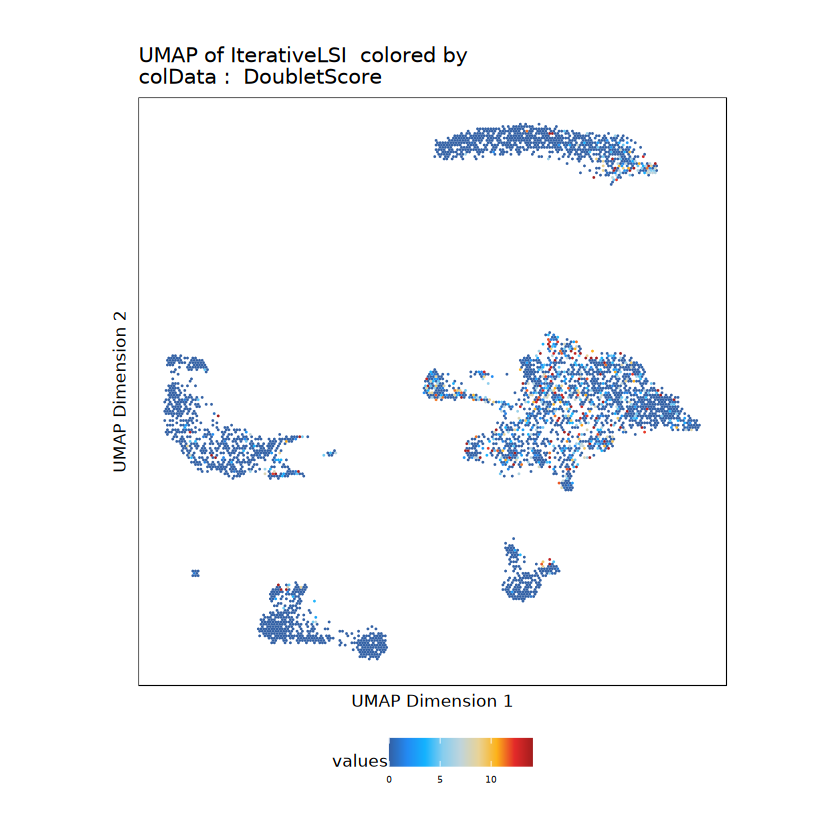

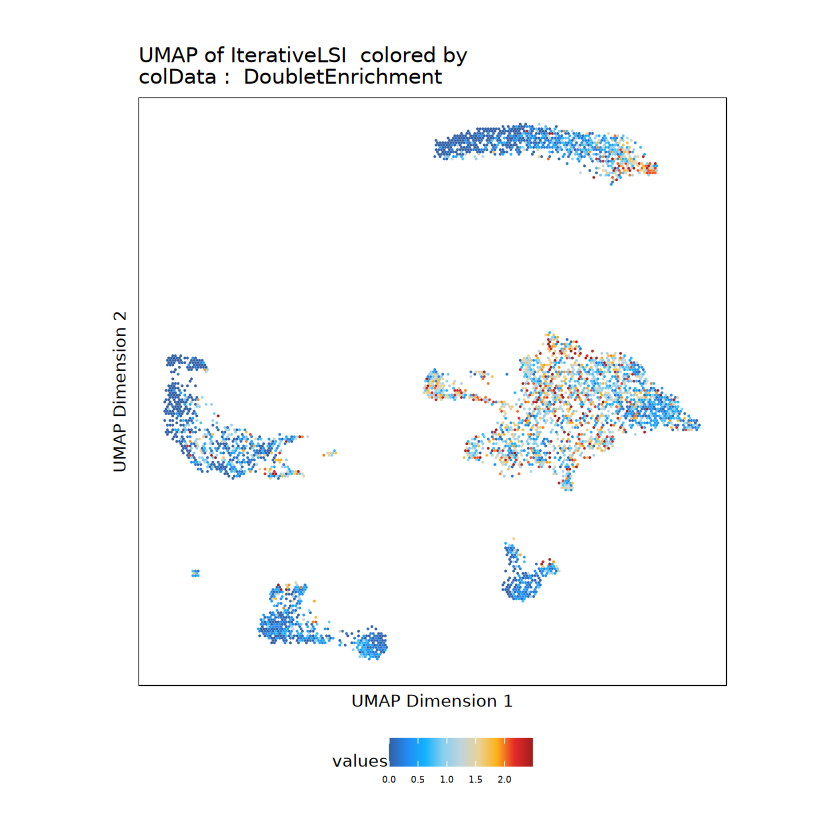

In [23]:
variables <- c('Clusters','nCount_ATAC', 'nFeature_ATAC', 'TSSEnrichment', 'nFrags',
                     'BlacklistRatio', 'nucleosome_signal', 'NucleosomeRatio','DoubletScore','DoubletEnrichment')
plot_list2 <- lapply(variables, function(var) {
    p <- plotEmbedding(
      ArchRProj = sub_proj1, 
      colorBy = "cellColData", 
      name = var, 
      embedding = "UMAP"
    )
    p + 
      ggtitle(paste("UMAP of", var, proj_name)) +  # Title for each plot
      theme_minimal() +  # A clean minimal theme
      theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels
  print(p)
})

#grid.arrange(grobs = plot_list2, ncol = 3, top = paste0(sample,"QC Metrics"))

In [24]:
setwd(Archr_Dir)
write.csv(archr_metadata1, file = "filtered_cells_metadata.csv", row.names = TRUE)